#   APPLIANCES ENERGY PREDICTION

### Name : Jyothis.M
### Organization : Entri Elevate
### Date :

## 1 Overview of problem statement
A ZigBee wireless sensor network was used to monitor the house's temperature and humidity levels. Every wireless node reported the temperature and humidity levels every 3.3 minutes. The wireless data was then averaged over 10 minute periods. The energy data was recorded every 10 minutes using m-bus energy metres. Weather from the nearest airport weather station (Chievres Airport, Belgium) was collected from a public data set from Reliable Prognosis (rp5.ru) and blended with the experimental data sets using the date and time columns. Two random variables were inclu|ded in the data set to test the regression models and to filter out non-predictive features (parameters).

The problem statement is to create a machine learning model that can accurately forecast energy usage based on the supplied features. This might be valuable for building managers, energy firms, and policymakers who need to optimise energy consumption, cut costs, and minimise the environmental impact of energy usage.

Specifically, the model should be able to reliably anticipate energy usage based on the different elements that influence energy consumption, such as temperature, humidity, illumination, and time of day. This can assist building managers and energy firms in identifying patterns and trends in energy consumption and making informed energy decisions, such as altering HVAC settings, optimising lighting, or introducing energy-efficient solutions. Policymakers can also utilise this data to create regulations and incentives that encourage energy efficiency and sustainability.

## 2 Objective
The goal of this machine learning project is to analyze and predict energy consumption patterns in a smart home environment using the comprehensive dataset provided. The dataset includes time-stamped records of various environmental and contextual factors such as indoor and outdoor temperatures, humidity levels, wind speed, and appliance energy consumption. This rich collection of numerical data offers a unique opportunity to develop predictive models and extract actionable insights for energy optimization.

The primary focus is on the Appliances feature, representing energy consumption, which serves as the target variable for prediction. By leveraging advanced data preprocessing, and selection techniques, this project aims to uncover key variables influencing energy usage. The inclusion of indoor environmental metrics (e.g., temp_living_room, hu_bathroom) alongside outdoor factors (e.g., temp_out, Windspeed) allows for a holistic understanding of energy dynamics.

Through this project, regression-based machine learning models will be developed to accurately forecast energy consumption. These predictions will support better energy management strategies, such as reducing unnecessary consumption, optimizing HVAC usage, and enhancing overall efficiency in smart homes.

The insights generated can benefit homeowners, energy providers, and policymakers by enabling data-driven decisions to promote sustainability. Additionally, the project will serve as a framework for building similar models in other settings, demonstrating the value of combining environmental monitoring with machine learning for intelligent energy solutions.

## 3 Data Description
### Source
https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction
### Features

#### Date time year-month-day hour:minute:second

#### Appliances- energy use in Wh

#### Lights- energy use of light fixtures in the house in Wh

#### T1- Temperature in kitchen area, in Celsius

#### RH_1- Humidity in kitchen area, in %

#### T2-Temperature in living room area, in Celsius

#### RH_2- Humidity in living room area, in %

#### T3- Temperature in laundry room area

#### RH_3- Humidity in laundry room area, in %

#### T4- Temperature in office room, in Celsius

#### RH_4- Humidity in office room, in %

#### T5- Temperature in bathroom, in Celsius

#### RH_5- Humidity in bathroom, in %

#### T6- Temperature outside the building (north side), in Celsius

#### RH_6- Humidity outside the building (north side), in %

#### T7-Temperature in ironing room , in Celsius

#### RH_7- Humidity in ironing room, in %

#### T8- Temperature in teenager room 2, in Celsius

#### RH_8- Humidity in teenager room 2, in %

#### T9-Temperature in parents room, in Celsius

#### RH_9- Humidity in parents room, in %

#### To-Temperature outside (from Chievres weather station), in Celsius

#### Pressure (from Chievres weather station)- in mm Hg

#### RH_out- Humidity outside (from Chievres weather station), in %

#### Wind speed (from Chievres weather station)- in m/s

#### Visibility (from Chievres weather station)-in km

#### Tdewpoint (from Chievres weather station)- Â°C

#### rv1- Random variable 1, nondimensional

#### rv2- Random variable 2, nondimensional

## 4 Data Collection

In [1]:

# Import Libraries for analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

## to import datetime library
from datetime import datetime
import datetime as dt

## Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

#Import necessary statistical libraries
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import norm
#import libraries for ML-Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import  LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  BaggingRegressor, ExtraTreesRegressor, RandomForestRegressor,StackingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import lightgbm
from lightgbm import LGBMRegressor
# libraries for save the model
import pickle
     

## 5 Data Preprocessing, Data Cleaning

#### Dataset Loading

In [2]:
# Load dataset
App_df = pd.read_csv("C:/Users/LENOVO/Downloads/energydata_complete.csv")

#### Dataset View

In [3]:
# Dataset First Look
App_df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


#### Total No.Of Rows And Columns

In [4]:
#Shape
App_df.shape

(19735, 29)

#### First Five Rows

In [5]:
App_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


#### Last Five Rows

In [6]:
App_df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


#### About Columns

In [7]:
App_df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [8]:
App_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

#### .Shape of the data frame is(19735*29)rows = 19735,columns = 29


In [9]:
print("Missing values in each column:\n")
print(App_df.isnull().sum())

Missing values in each column:

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


##### ..No missing values are here.

In [10]:
print("Duplicate values:")
print(App_df.duplicated().sum())

Duplicate values:
0


##### ..No duplicate values.

#### Dataset Information

In [11]:
#Dataset info
App_df.info()
App_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


<Figure size 1000x1000 with 0 Axes>

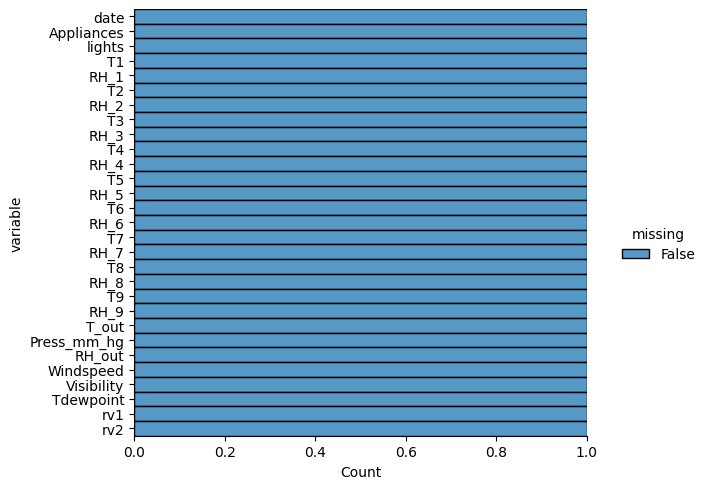

In [12]:
# Visualizing the missing values
plt.figure(figsize=(10,10))
sns.displot(
    data=App_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

### What did you know about your dataset?
#### The dataset provided contains 29 columns and 19735 rows and does not have any missing or duplicate values.

#### The goal is to predict the energy use of appliances. Demand prediction involves analytical studies on the probability of house temperature and humidity conditions

#### There are no duplicate columns

#### There are no missing values

### Check Unique Values For Each Variable.

In [13]:
# Check Unique Values for each variable.
def get_unqiuevalues(df1):
    unique_values=df1.apply(pd.Series.unique)
    return unique_values

unq_values = get_unqiuevalues(App_df)

# Check Unique Values for each variable.
for i in App_df.columns.tolist():
  print("No. of unique values in ",i,"is",App_df[i].nunique())


No. of unique values in  date is 19735
No. of unique values in  Appliances is 92
No. of unique values in  lights is 8
No. of unique values in  T1 is 722
No. of unique values in  RH_1 is 2547
No. of unique values in  T2 is 1650
No. of unique values in  RH_2 is 3376
No. of unique values in  T3 is 1426
No. of unique values in  RH_3 is 2618
No. of unique values in  T4 is 1390
No. of unique values in  RH_4 is 2987
No. of unique values in  T5 is 2263
No. of unique values in  RH_5 is 7571
No. of unique values in  T6 is 4446
No. of unique values in  RH_6 is 9709
No. of unique values in  T7 is 1955
No. of unique values in  RH_7 is 5891
No. of unique values in  T8 is 2228
No. of unique values in  RH_8 is 6649
No. of unique values in  T9 is 924
No. of unique values in  RH_9 is 3388
No. of unique values in  T_out is 1730
No. of unique values in  Press_mm_hg is 2189
No. of unique values in  RH_out is 566
No. of unique values in  Windspeed is 189
No. of unique values in  Visibility is 413
No. of uni

## Data Wrangling

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
df_energy = App_df.copy()
df_energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [15]:
#rename the columns
df_energy.rename(columns={'T1': 'temp_kitchen', 'RH_1':'hu_Kitchen', 'T2':'temp_living_room', 'RH_2': 'hu_living', 'T3':'temp_Laundry_room',
       'RH_3':'hu_laundry', 'T4':'temp_office_room', 'RH_4':'hu_office', 'T5':'temp_bathroom', 'RH_5':'hu_bath', 'T6':'temp_build_out'
       , 'RH_6':'hu_build_out', 'T7':'temp_ironing_room', 'RH_7':'hu_ironing_room', 'T8':'temp_teen_room',
       'RH_8':'hu_teen', 'T9':'temp_parents_room', 'RH_9':'hu_parent', 'T_out':'temp_out', 'RH_out':'out_humidity'},inplace = True)
     

In [16]:
df_energy.columns

Index(['date', 'Appliances', 'lights', 'temp_kitchen', 'hu_Kitchen',
       'temp_living_room', 'hu_living', 'temp_Laundry_room', 'hu_laundry',
       'temp_office_room', 'hu_office', 'temp_bathroom', 'hu_bath',
       'temp_build_out', 'hu_build_out', 'temp_ironing_room',
       'hu_ironing_room', 'temp_teen_room', 'hu_teen', 'temp_parents_room',
       'hu_parent', 'temp_out', 'Press_mm_hg', 'out_humidity', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [17]:
df_energy.head()

,date,Appliances,lights,temp_kitchen,hu_Kitchen,temp_living_room,hu_living,temp_Laundry_room,hu_laundry,temp_office_room,...,temp_parents_room,hu_parent,temp_out,Press_mm_hg,out_humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [18]:
df_energy.describe()

,Appliances,lights,temp_kitchen,hu_Kitchen,temp_living_room,hu_living,temp_Laundry_room,hu_laundry,temp_office_room,hu_office,...,temp_parents_room,hu_parent,temp_out,Press_mm_hg,out_humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [19]:
import pandas as pd

# Assuming your dataframe has a 'timestamp' column
# To generate a sample dataframe for demonstration:


# Convert the 'timestamp' column to datetime
df_energy['date']=pd.to_datetime(df_energy['date'])

#Getting the months and days from date

df_energy['month'] = df_energy['date'].dt.month
df_energy['weekday'] = df_energy['date'].dt.weekday
df_energy['hour'] = df_energy['date'].dt.hour

#drop the date column
df_energy.drop('date',axis=1,inplace=True)


# Print the updated dataframe
df_energy.head()

,Appliances,lights,temp_kitchen,hu_Kitchen,temp_living_room,hu_living,temp_Laundry_room,hu_laundry,temp_office_room,hu_office,...,Press_mm_hg,out_humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday,hour
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,0,17
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,0,17
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,0,17
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,0,17
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,0,17


In [20]:
#separate column list for better analysis
temp_cols=['temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','temp_build_out','temp_ironing_room','temp_teen_room','temp_parents_room']
hu_cols=['hu_Kitchen','hu_living','hu_laundry', 'hu_office','hu_bath','hu_build_out','hu_ironing_room','hu_teen','hu_parent']
light_cols=['light']
weather_cols=['temp_out','out_humidity',"Tdewpoint","Press_mm_hg","Windspeed","Visibility"]
date_col = ['month','weekday','hour']
random_col = ["rv1","rv2"]
     

### What all manipulations have you done and insights you found?
#### 1.Splitting date columns into hour,weekdays, months.
#### 2.It will help in analysing the data on the bases of months, days and hours.
#### 3.Dropped date column due to no further use of them.
#### 4.Renaming of some features, for better understanding and readability

### Skewness Number

In [21]:
## skweness of  target column
skew_App = df_energy.Appliances.skew()
print("The skweness of  Appliances column is", skew_App )
     

The skweness of  Appliances column is 3.3863672147430632


In [22]:
## skweness of  temperature columns
for col  in temp_cols:
  skewness = df_energy[col].skew(axis=0, skipna = True)
  print("The skweness of " ,col ,"is",skewness  )
     

The skweness of  temp_kitchen is 0.12091711738520292
The skweness of  temp_living_room is 0.8896578498994725
The skweness of  temp_Laundry_room is 0.4507773351008748
The skweness of  temp_office_room is 0.17038405715992935
The skweness of  temp_bathroom is 0.5582196988262588
The skweness of  temp_build_out is 0.5974713395616409
The skweness of  temp_ironing_room is 0.2547224169425056
The skweness of  temp_teen_room is -0.25615113577916404
The skweness of  temp_parents_room is 0.3827112390301909


In [23]:
## skweness of  humidity columns
for col  in hu_cols:
  skewness = df_energy[col].skew(axis=0, skipna = True)
  print("The skweness of " ,col ,"is",skewness  )

The skweness of  hu_Kitchen is 0.46577375642231555
The skweness of  hu_living is -0.26824717344228066
The skweness of  hu_laundry is 0.46758907995240717
The skweness of  hu_office is 0.4446143392062077
The skweness of  hu_bath is 1.8668200195471256
The skweness of  hu_build_out is -0.24196120045189282
The skweness of  hu_ironing_room is 0.24214082895027994
The skweness of  hu_teen is 0.30803561491175263
The skweness of  hu_parent is 0.36893704325030624


In [24]:
## skweness of weather columns
for col  in weather_cols:
  skewness = df_energy[col].skew(axis=0, skipna = True)
  print("The skweness of " ,col ,"is",skewness  )
     

The skweness of  temp_out is 0.5342726299233068
The skweness of  out_humidity is -0.9229972472879404
The skweness of  Tdewpoint is 0.23937407657340345
The skweness of  Press_mm_hg is -0.42044151823482934
The skweness of  Windspeed is 0.8599821006227247
The skweness of  Visibility is 0.4415544617776744


In [25]:
## skweness of lights column
skew_light = df_energy.lights.skew()
print("The skweness of  light column is", skew_light )
     

The skweness of  light column is 2.1951550406999196


In [26]:
## skweness of date columns
for col  in date_col:
  skewness = df_energy[col].skew(axis=0, skipna = True)
  print("The skweness of " ,col ,"is",skewness  )
     

The skweness of  month is -0.06796901264352721
The skweness of  weekday is 0.019354272409647544
The skweness of  hour is -0.000673050093866728


In [27]:
## skweness of random columns
for col  in random_col:
  skewness = df_energy[col].skew(axis=0, skipna = True)
  print("The skweness of " ,col ,"is",skewness  )
     

The skweness of  rv1 is 0.004944595412162004
The skweness of  rv2 is 0.004944595412162004


##  6 Exploratory Data Analysis(EDA)

## Data Visualization, Reporting & Experimenting With Graphs: Understand The Relationships Between Variables


#### visualization of target column

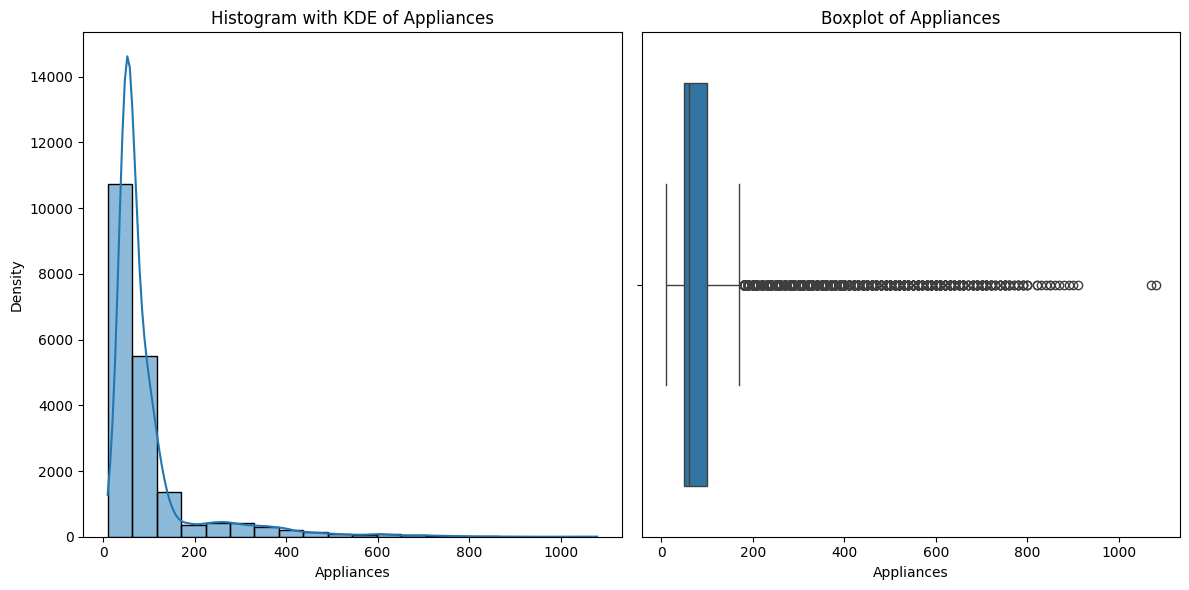

In [28]:
#Dependent varaible "Appliance"
plt.figure(figsize=(12, 6))

# First subplot: Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_energy['Appliances'], bins=20, kde=True, )
plt.title("Histogram with KDE of Appliances")
plt.xlabel("Appliances")
plt.ylabel("Density")

# Second subplot: Box Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.boxplot(x=df_energy['Appliances'], )
plt.title("Boxplot of Appliances")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### visualization of temperature columns

In [29]:

def visualize_temp_cols(df_energy, feature):
    plt.figure(figsize=(12,4))

    #histogram
    plt.subplot(1,2,1)
    sns.histplot(data=df_energy, x=feature, kde=True)
    plt.title(f' {feature}')
    
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=df_energy, y=feature,)
    plt.title(f'{feature}')
    
    plt.show()

In [30]:
temp_cols

['temp_kitchen',
 'temp_living_room',
 'temp_Laundry_room',
 'temp_office_room',
 'temp_bathroom',
 'temp_build_out',
 'temp_ironing_room',
 'temp_teen_room',
 'temp_parents_room']

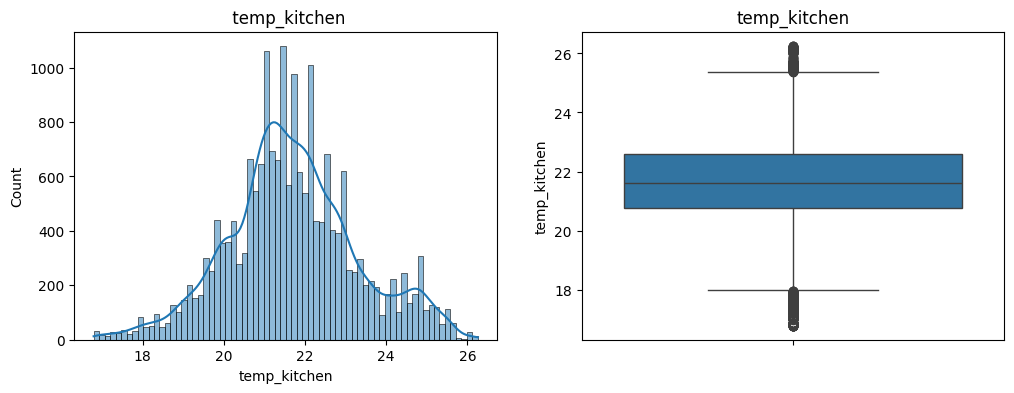

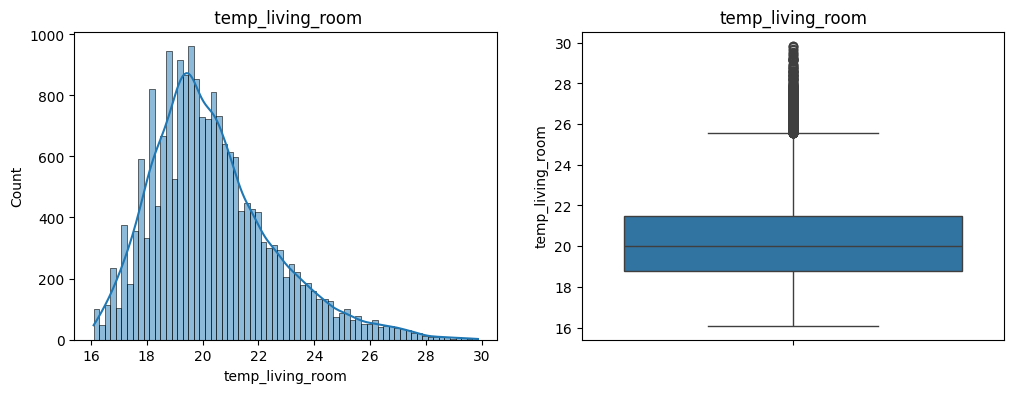

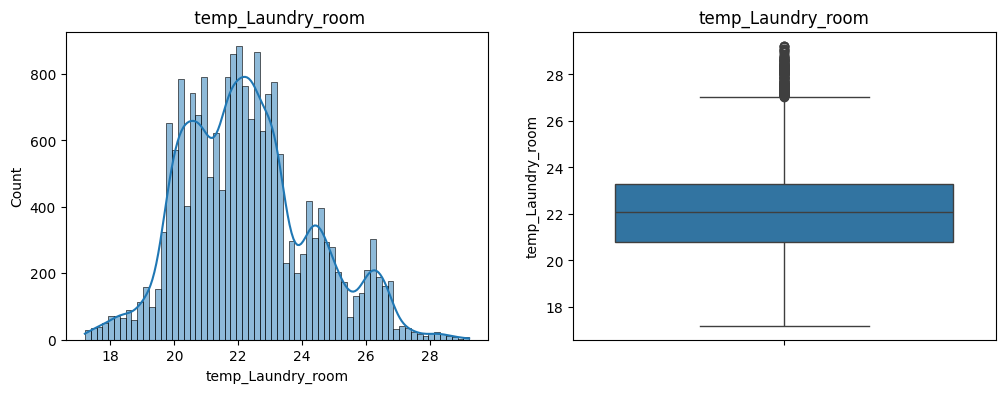

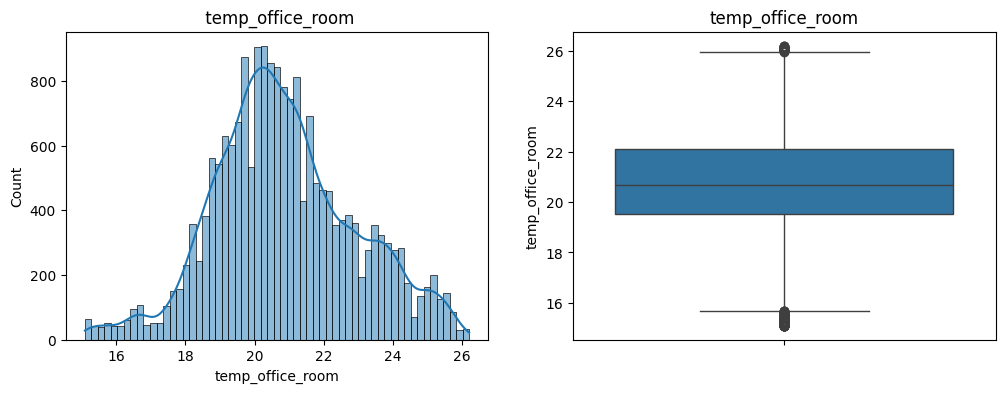

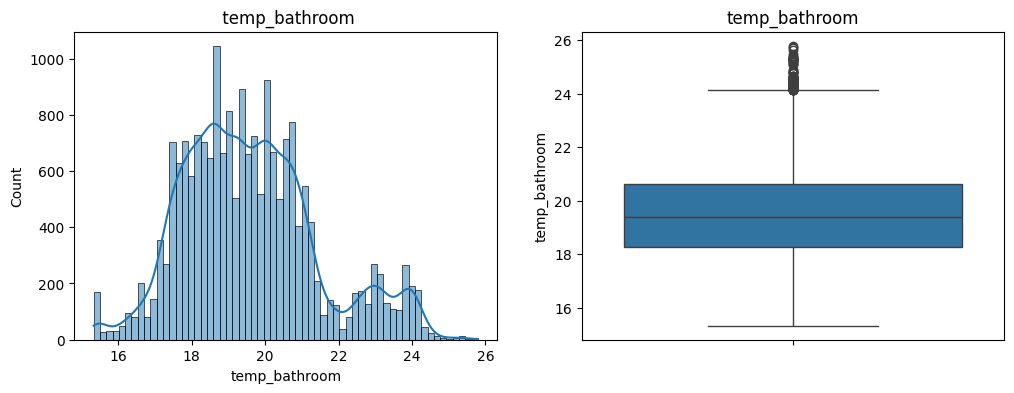

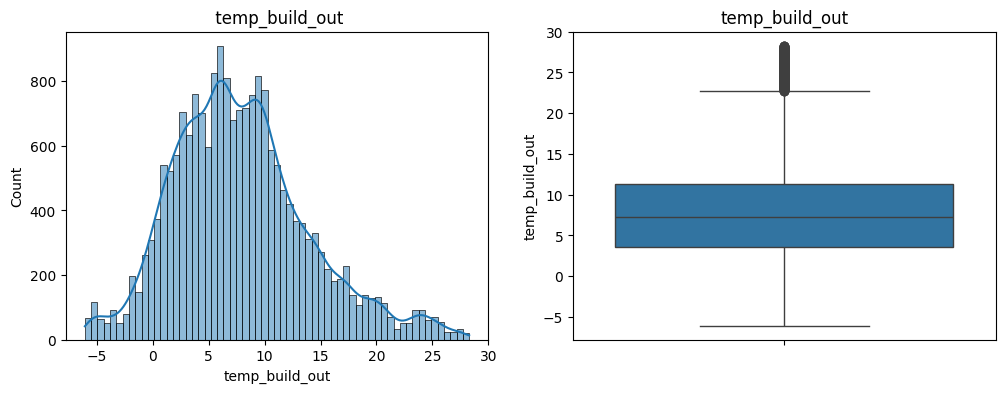

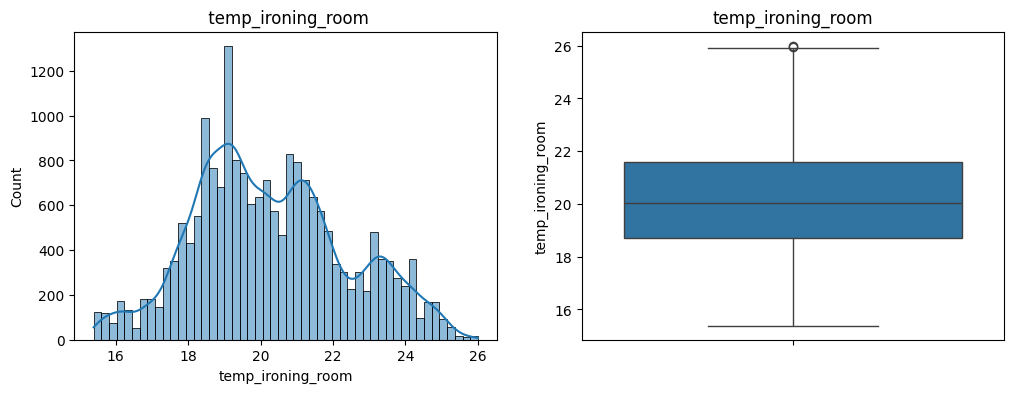

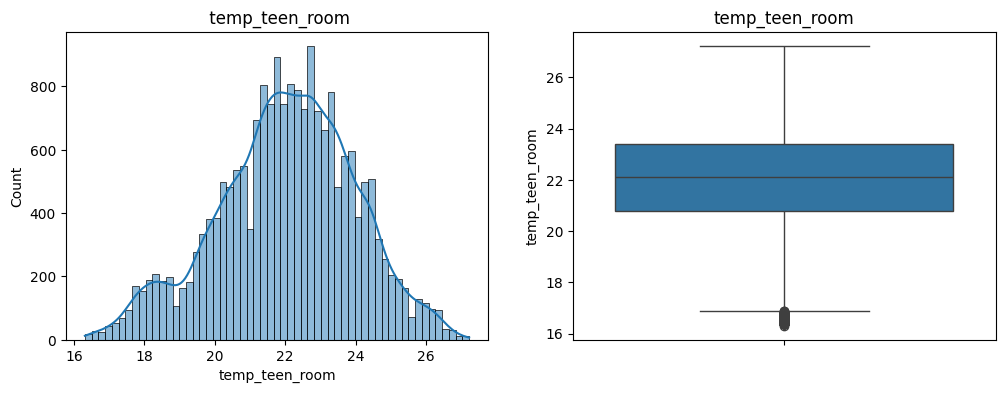

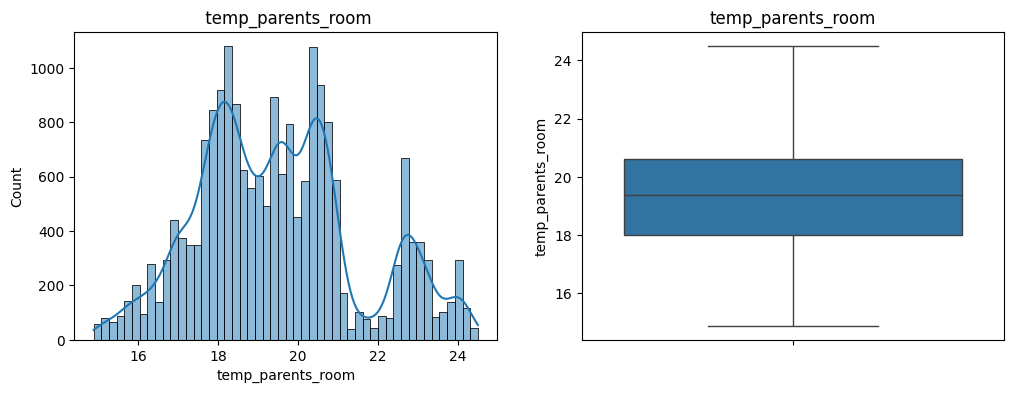

In [31]:
for feature in temp_cols:
    visualize_temp_cols(df_energy, feature)

#### visualization of humidity columns

In [32]:

def visualize_hu_cols(df_energy, feature):
    plt.figure(figsize=(12,4))

    #histogram
    plt.subplot(1,2,1)
    sns.histplot(data=df_energy, x=feature, kde=True)
    plt.title(f' {feature}')
    
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=df_energy, y=feature,)
    plt.title(f'{feature}')
    
    plt.show()

In [33]:
hu_cols

['hu_Kitchen',
 'hu_living',
 'hu_laundry',
 'hu_office',
 'hu_bath',
 'hu_build_out',
 'hu_ironing_room',
 'hu_teen',
 'hu_parent']

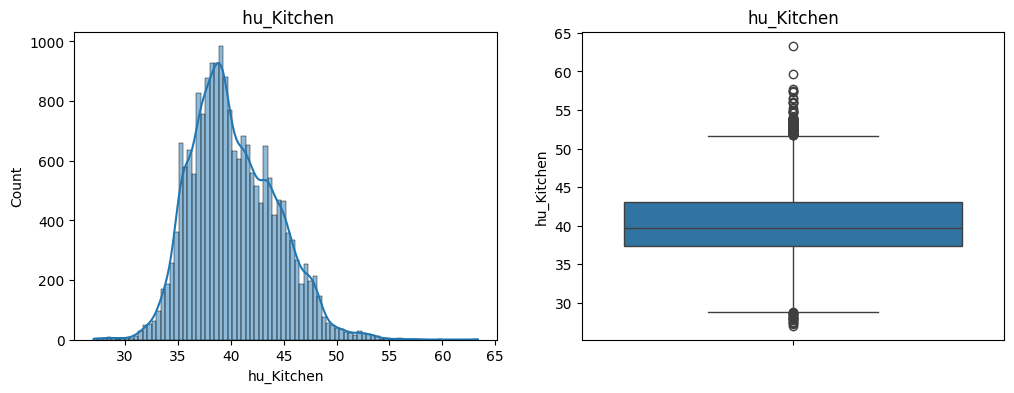

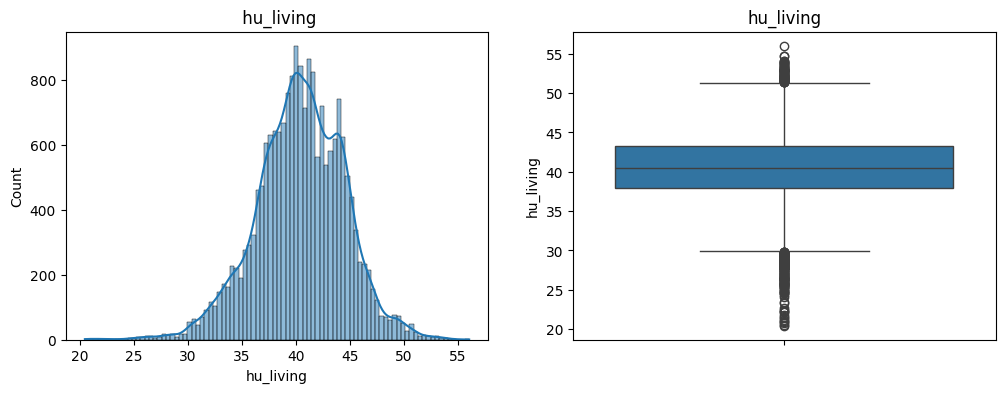

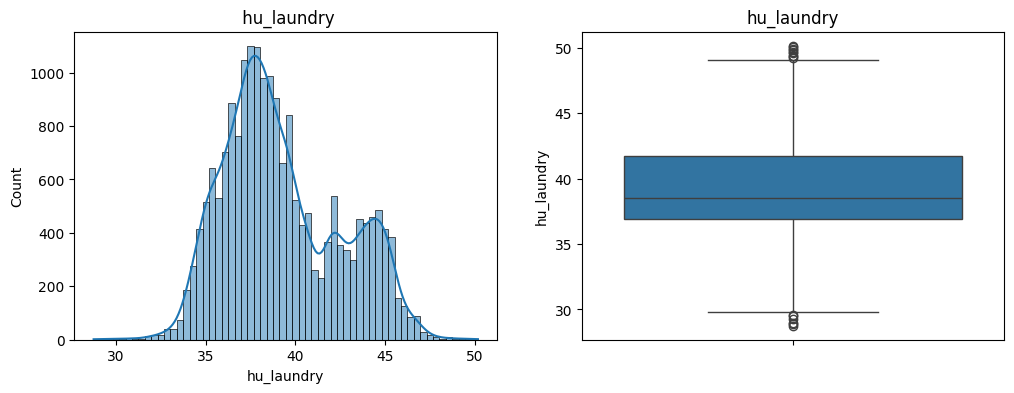

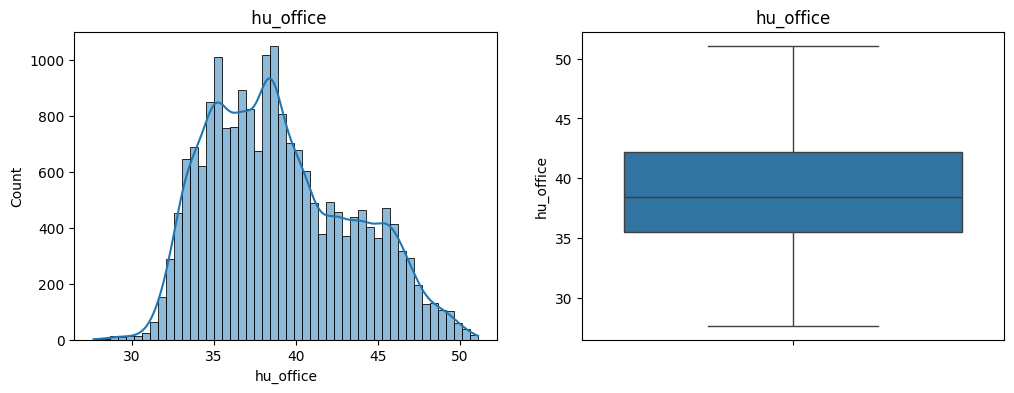

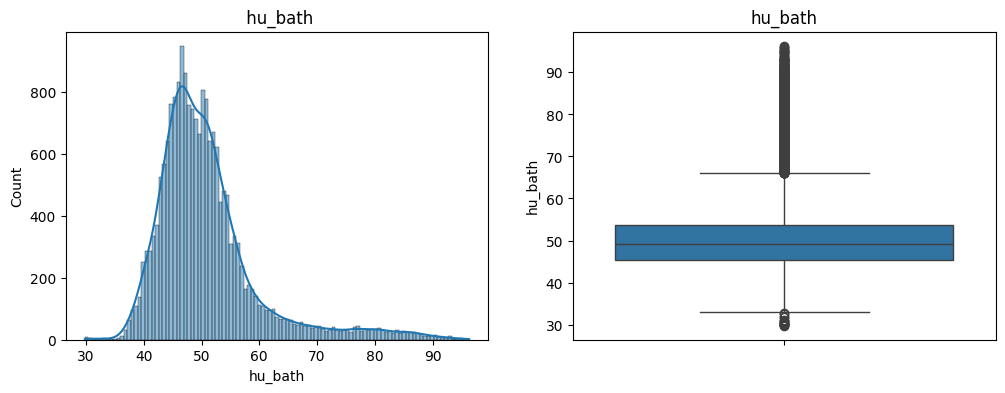

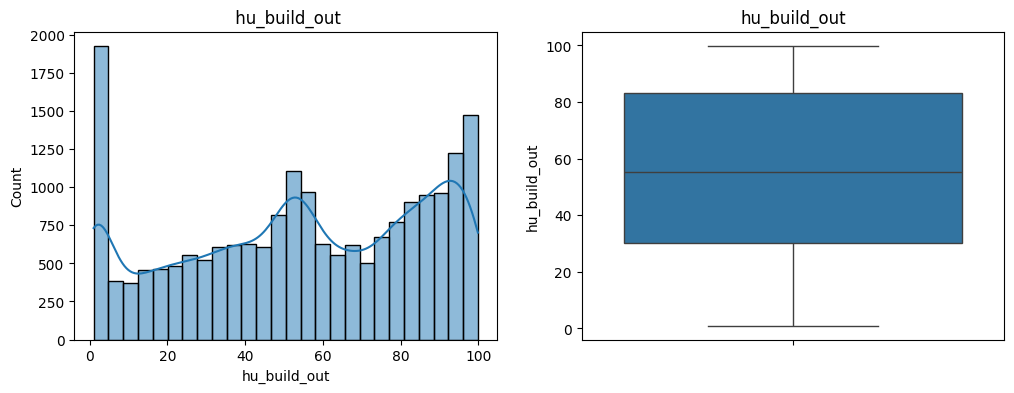

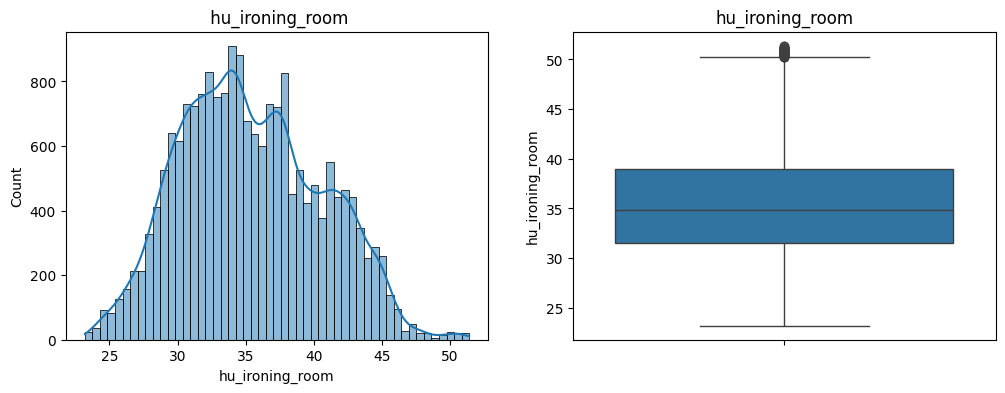

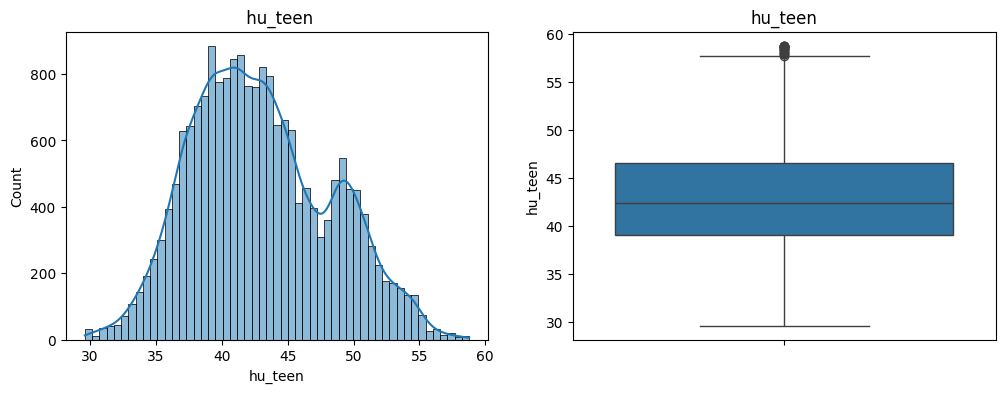

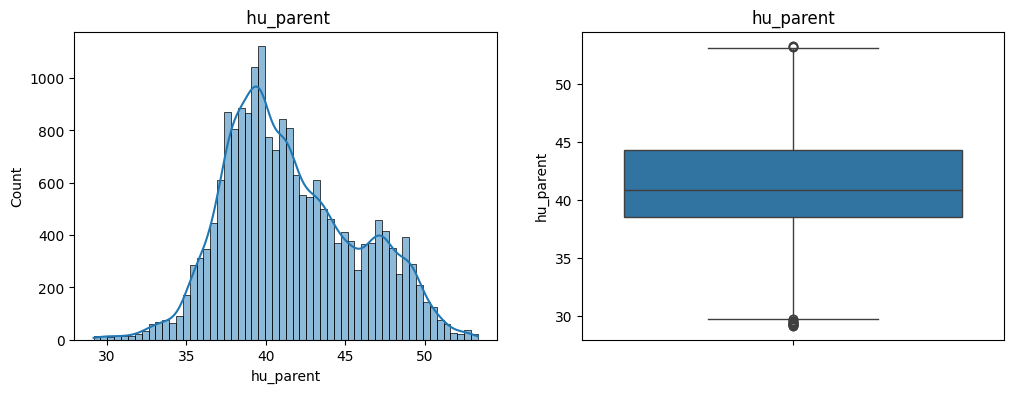

In [34]:
for feature in hu_cols:
    visualize_hu_cols(df_energy, feature)

#### visualization of weather columns

In [35]:

def visualize_weather_cols(df_energy, feature):
    plt.figure(figsize=(12,4))

    #histogram
    plt.subplot(1,2,1)
    sns.histplot(data=df_energy, x=feature, kde=True)
    plt.title(f' {feature}')
    
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=df_energy, y=feature,)
    plt.title(f'{feature}')
    
    plt.show()

In [36]:
weather_cols

['temp_out',
 'out_humidity',
 'Tdewpoint',
 'Press_mm_hg',
 'Windspeed',
 'Visibility']

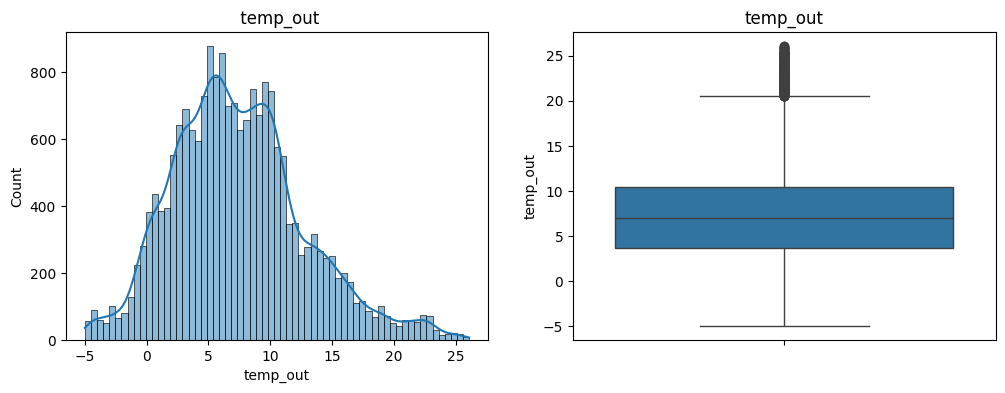

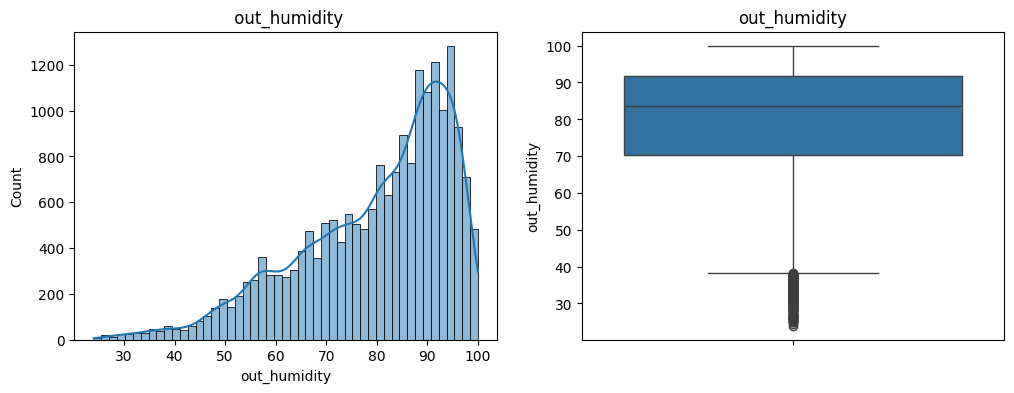

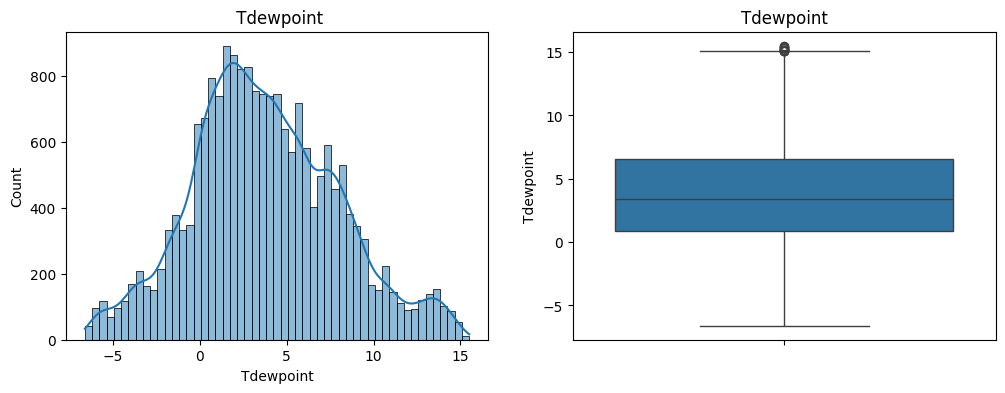

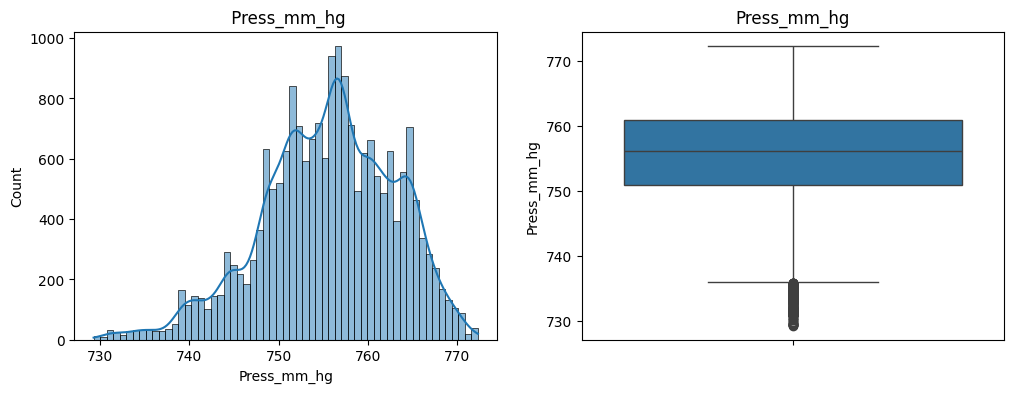

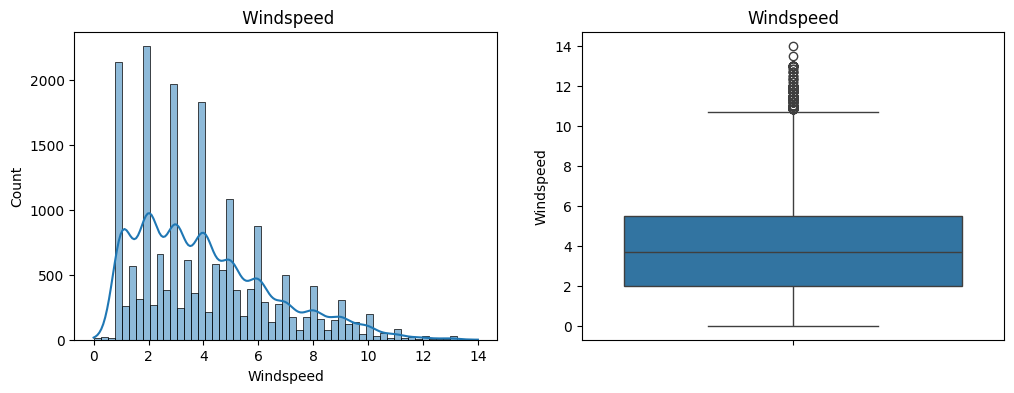

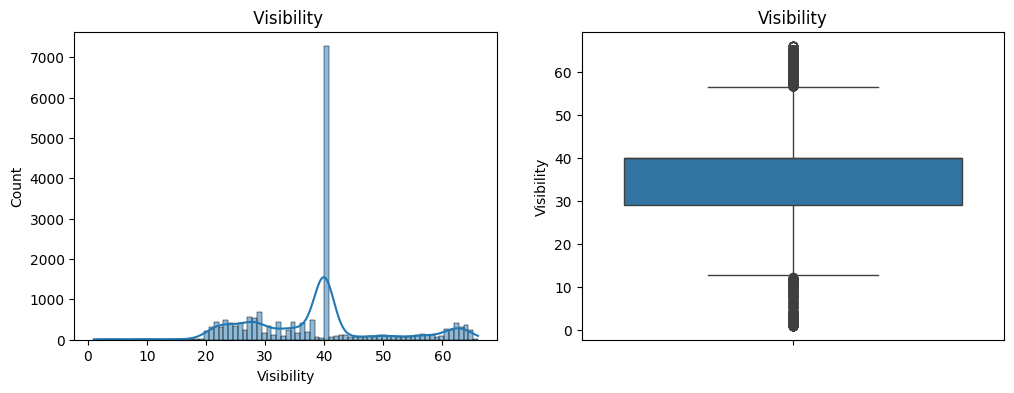

In [37]:
for feature in weather_cols:
    visualize_weather_cols(df_energy,feature)

#### visualization of lights column

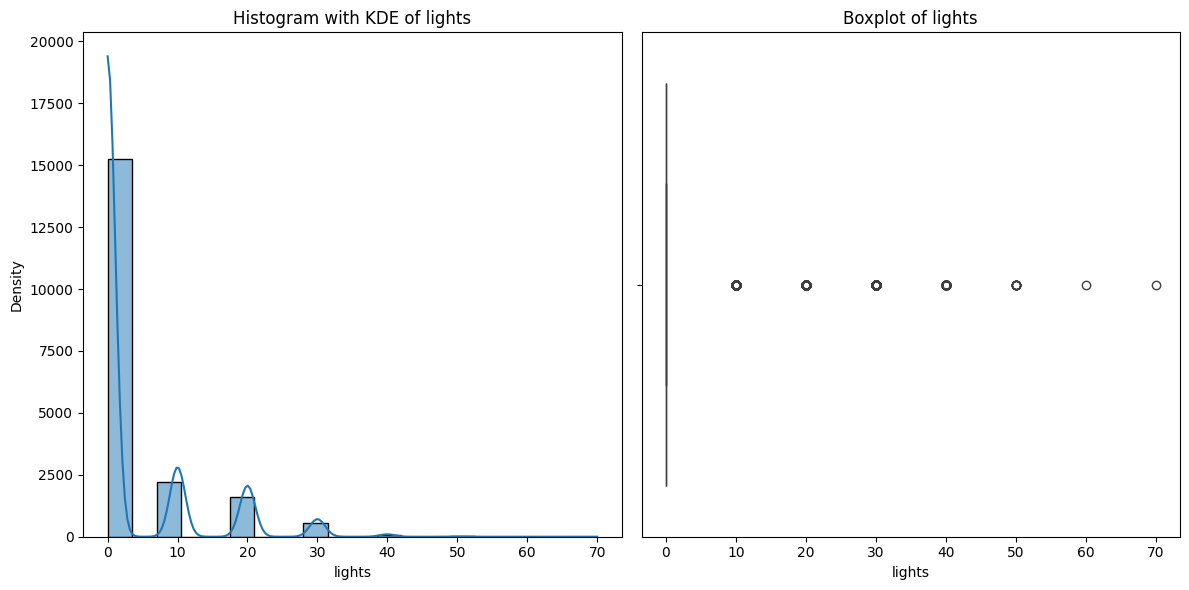

In [38]:

plt.figure(figsize=(12, 6))

# First subplot: Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_energy['lights'], bins=20, kde=True, )
plt.title("Histogram with KDE of lights")
plt.xlabel("lights")
plt.ylabel("Density")

# Second subplot: Box Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.boxplot(x=df_energy['lights'], )
plt.title("Boxplot of lights")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



#### visualization of date columns

In [39]:

def visualize_date_col(df_energy, feature):
    plt.figure(figsize=(12,4))

    #histogram
    plt.subplot(1,2,1)
    sns.histplot(data=df_energy, x=feature, kde=True)
    plt.title(f' {feature}')
    
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=df_energy, y=feature,)
    plt.title(f'{feature}')
    
    plt.show()

In [40]:
date_col

['month', 'weekday', 'hour']

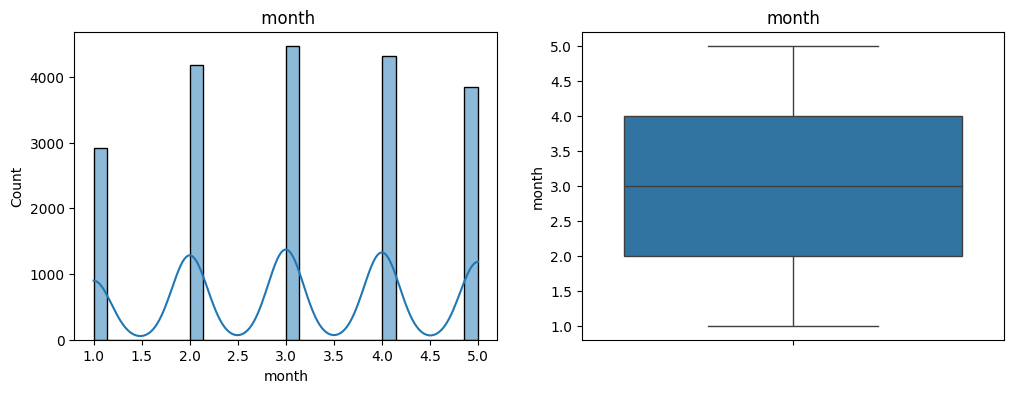

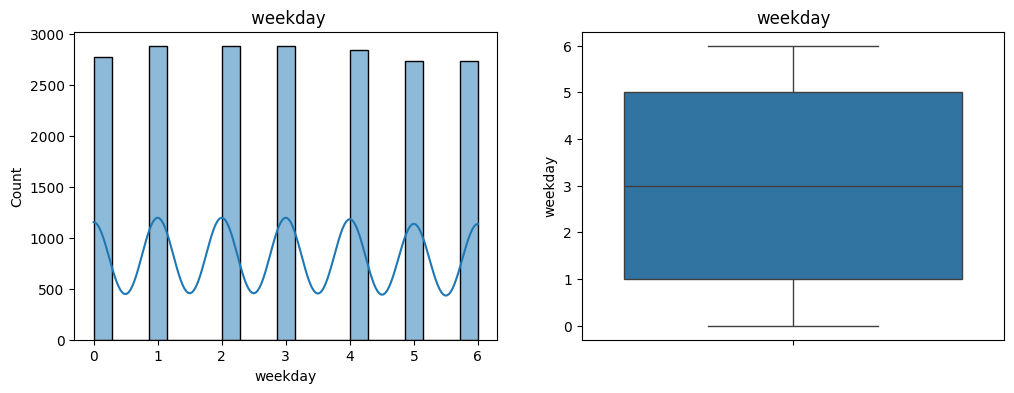

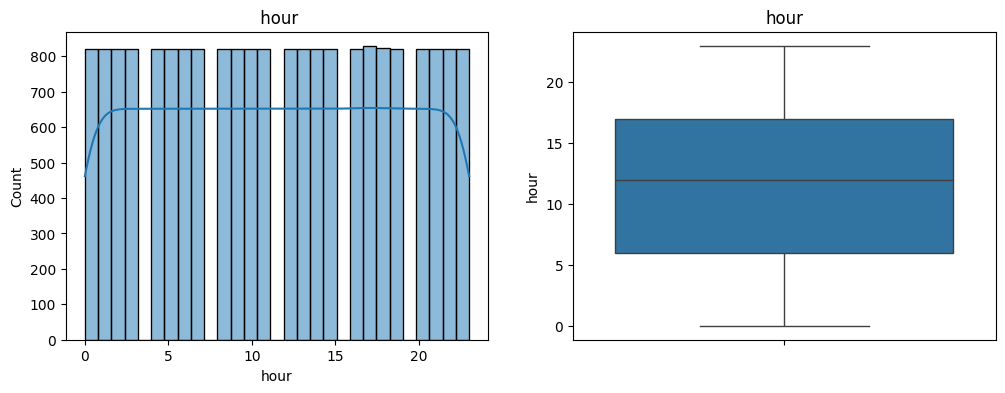

In [41]:
for feature in date_col:
    visualize_date_col(df_energy,feature)

#### visualization of random columns

In [42]:

def visualize_random_col(df_energy, feature):
    plt.figure(figsize=(12,4))

    #histogram
    plt.subplot(1,2,1)
    sns.histplot(data=df_energy, x=feature, kde=True)
    plt.title(f' {feature}')
    
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=df_energy, y=feature,)
    plt.title(f'{feature}')
    
    plt.show()

In [43]:
random_col

['rv1', 'rv2']

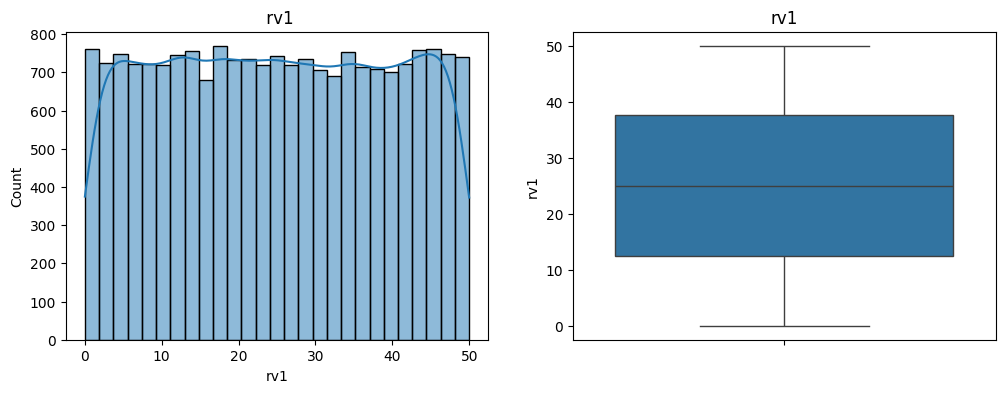

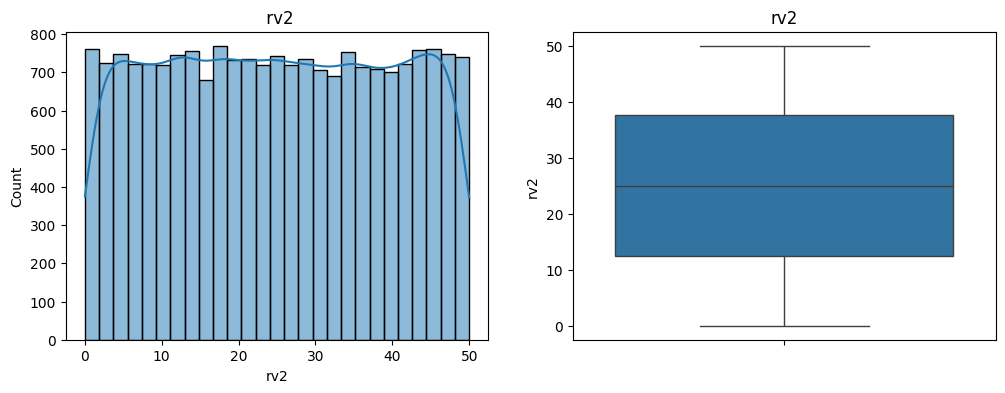

In [44]:
for feature in random_col:
    visualize_random_col(df_energy,feature)
    

# Detecting and treating outliers(IQR)

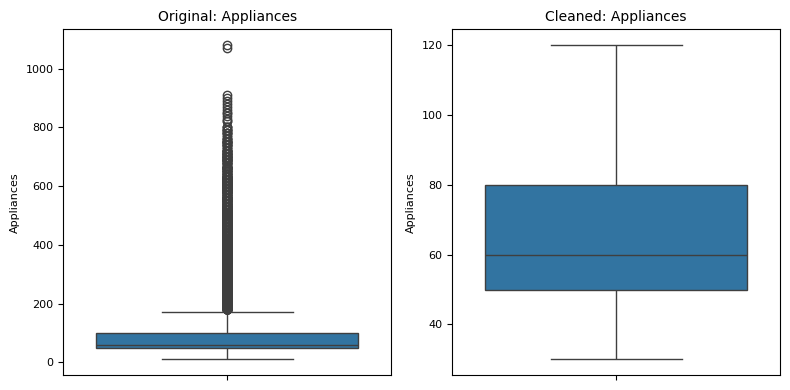

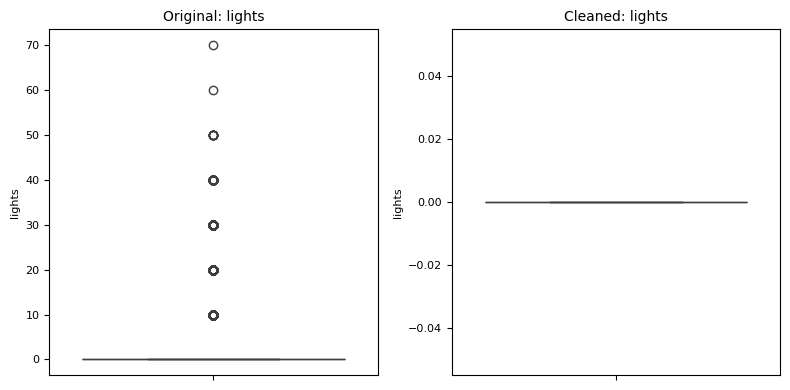

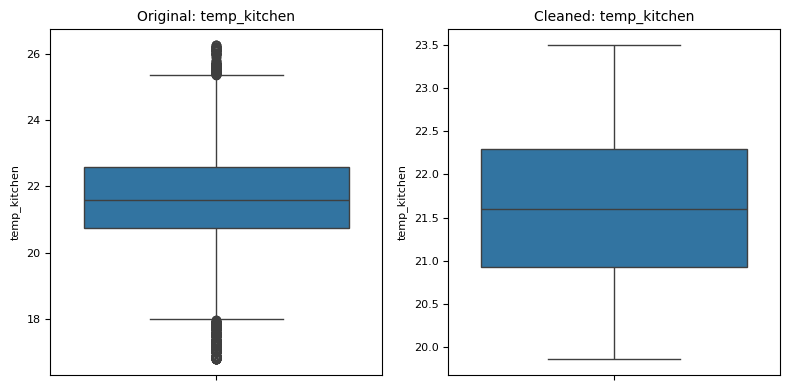

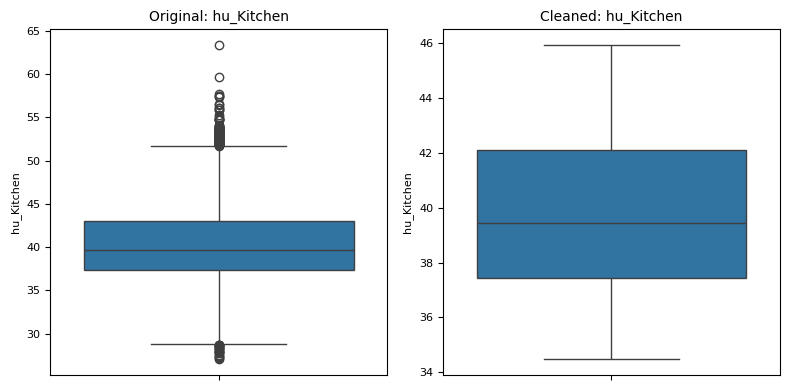

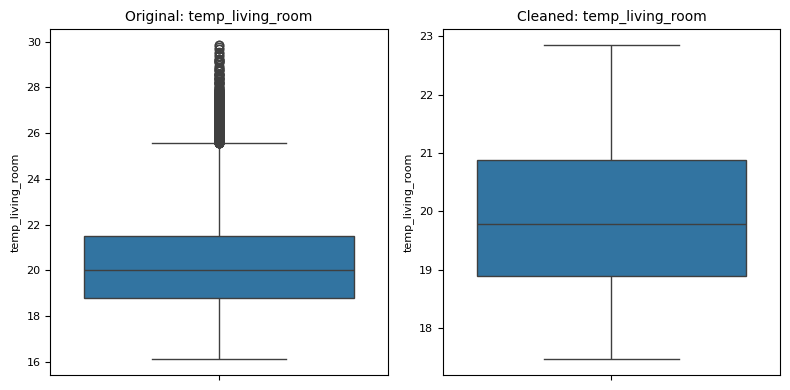

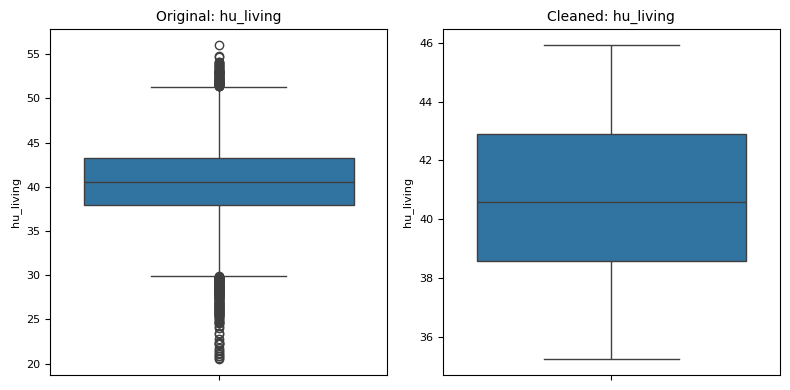

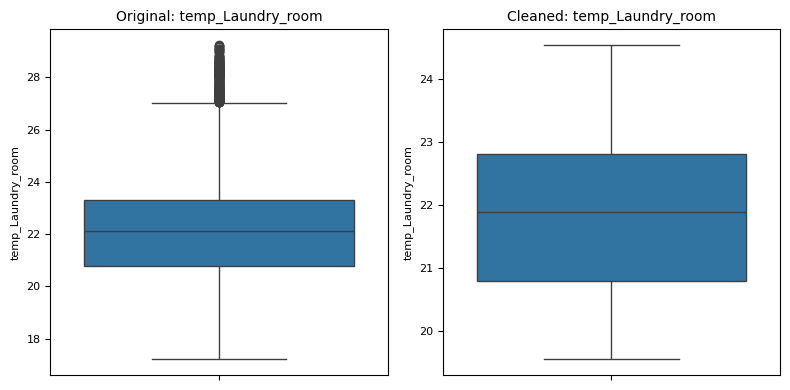

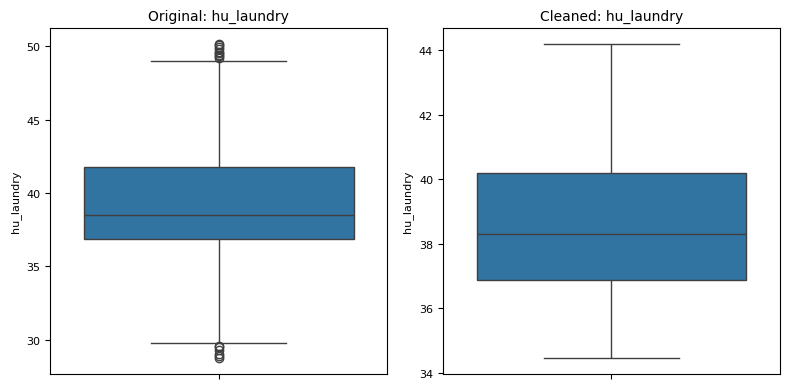

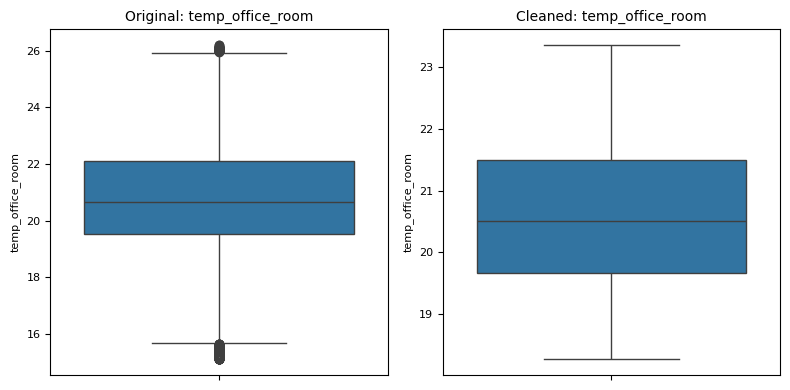

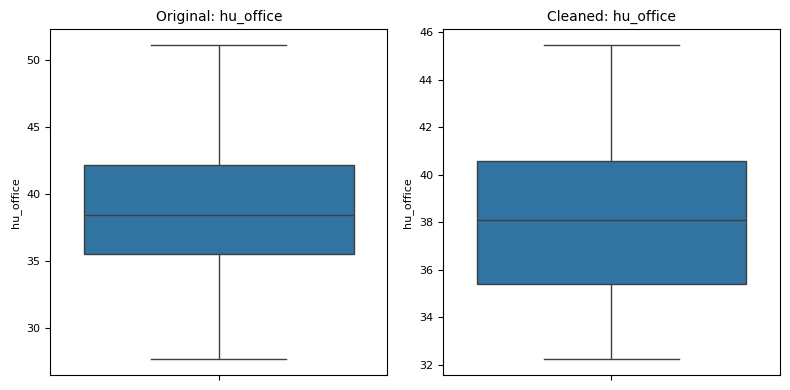

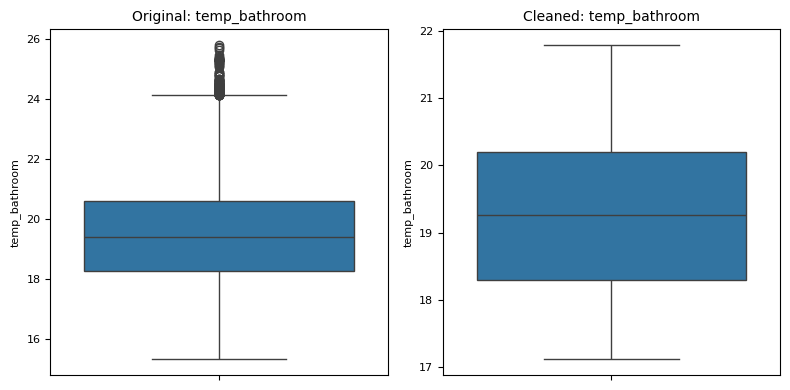

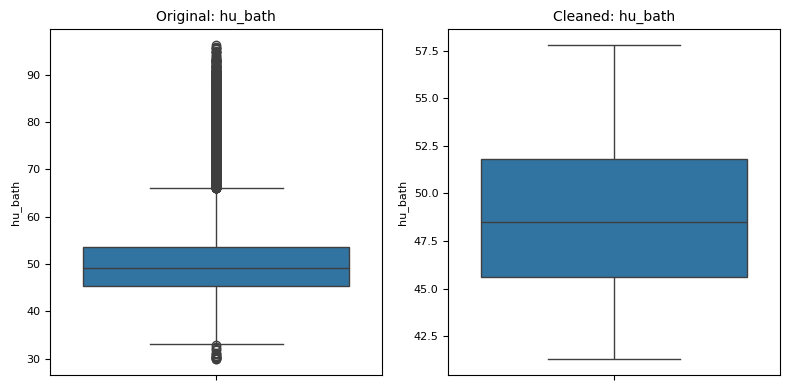

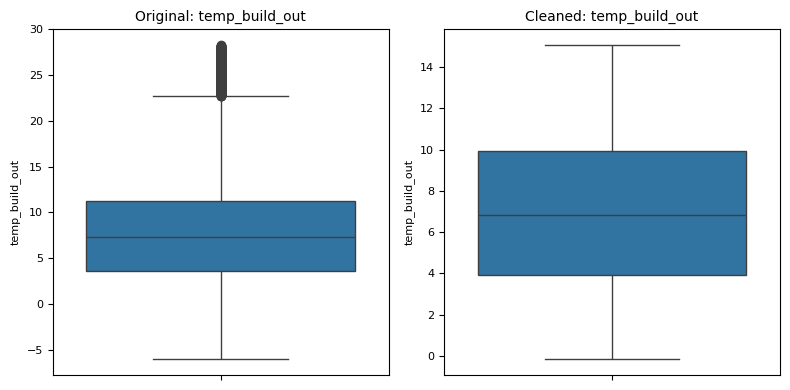

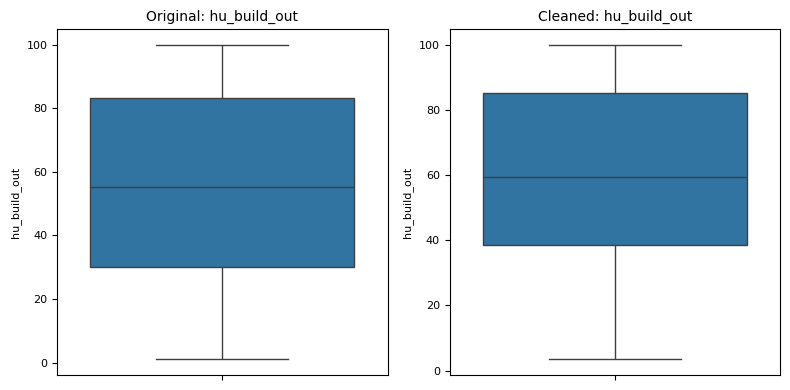

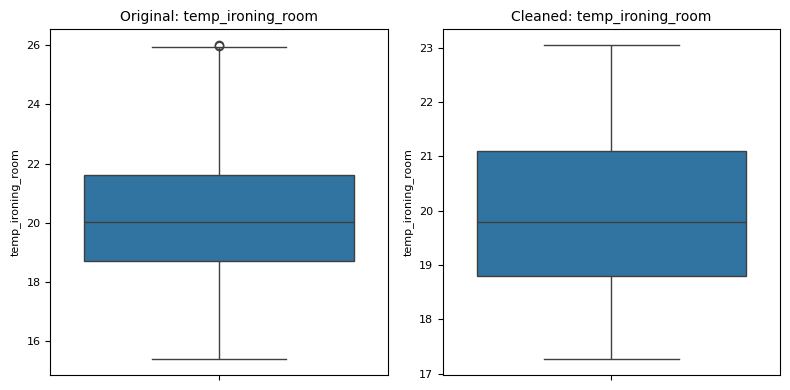

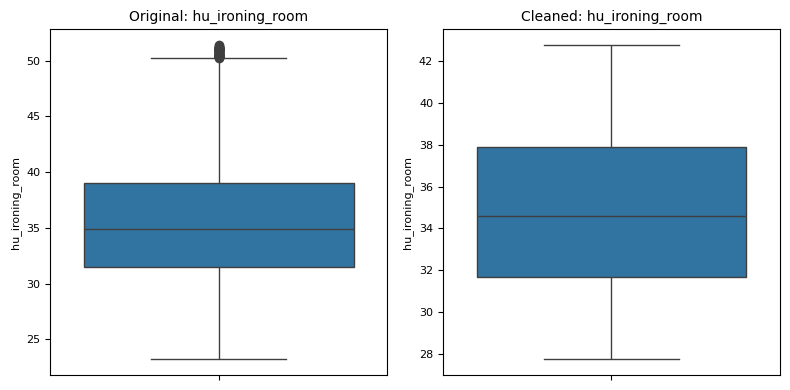

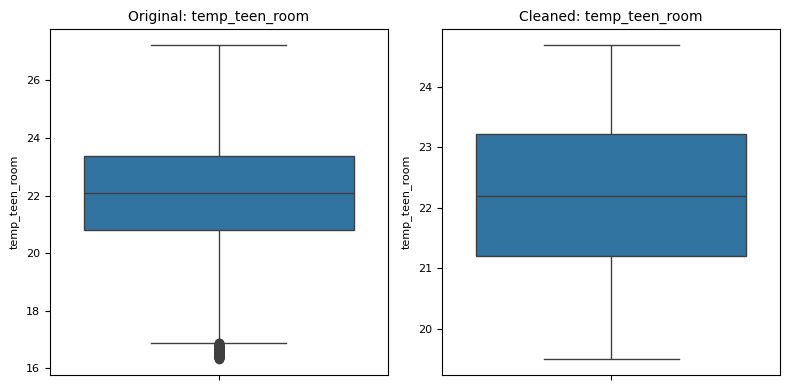

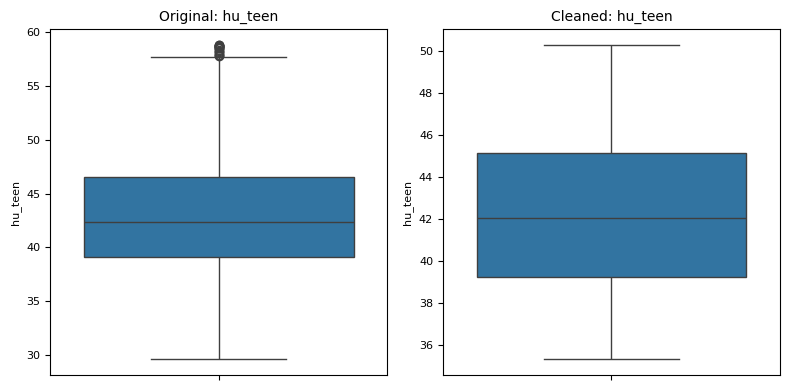

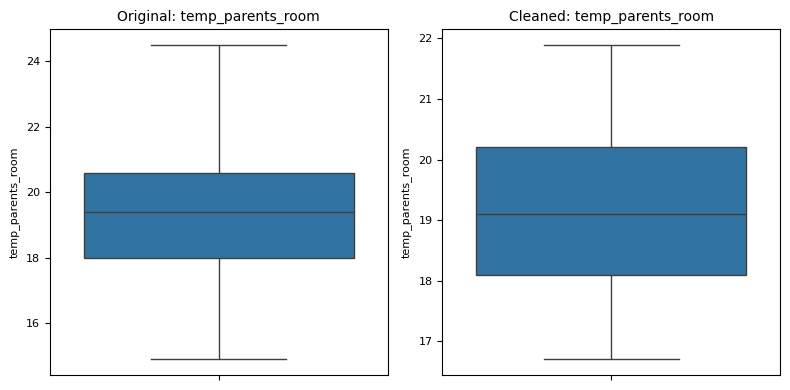

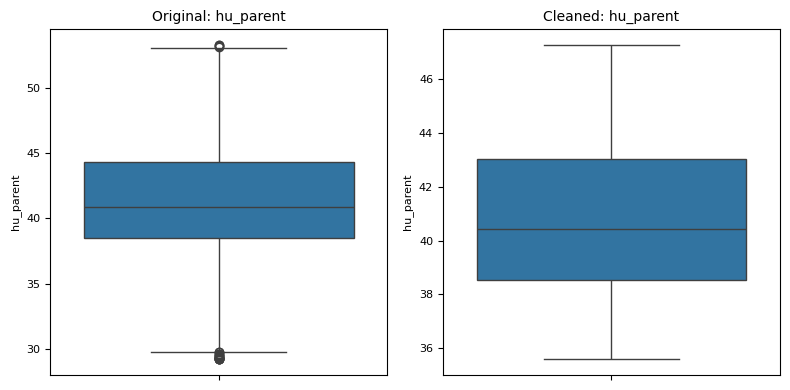

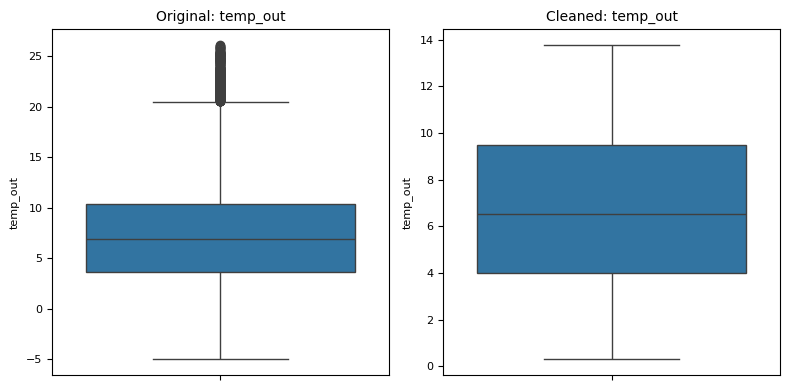

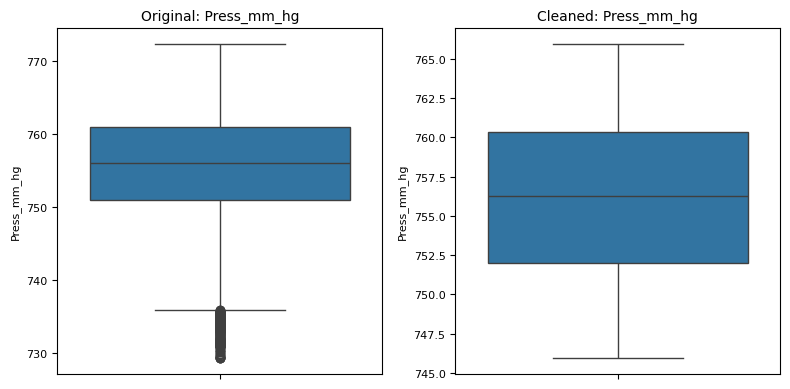

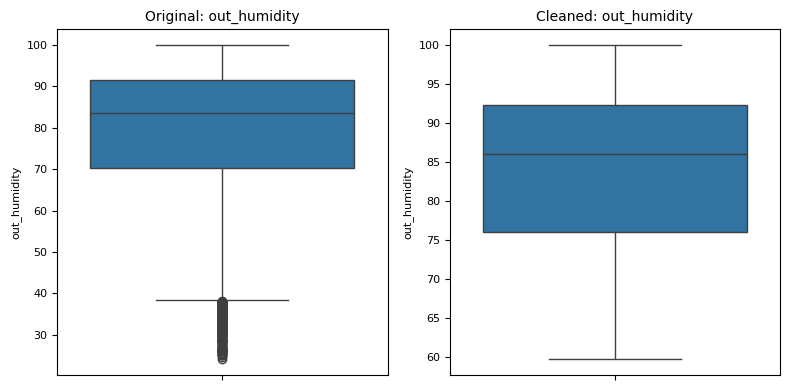

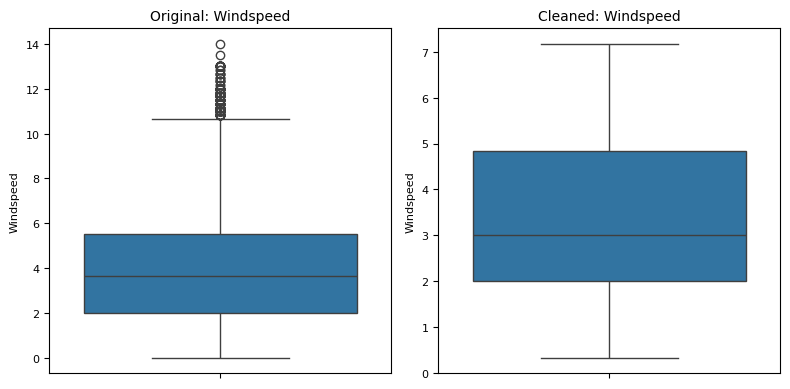

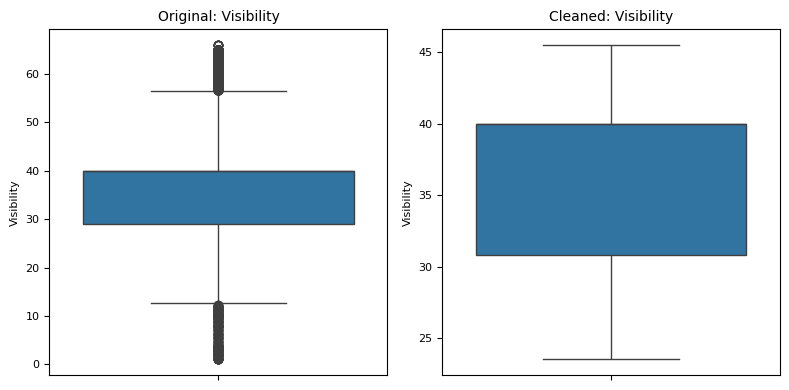

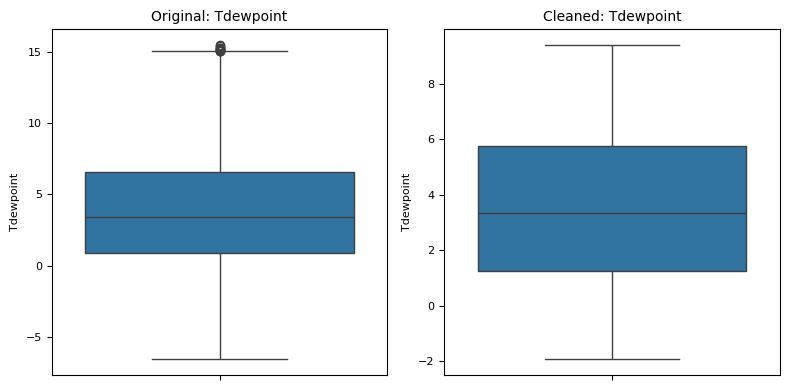

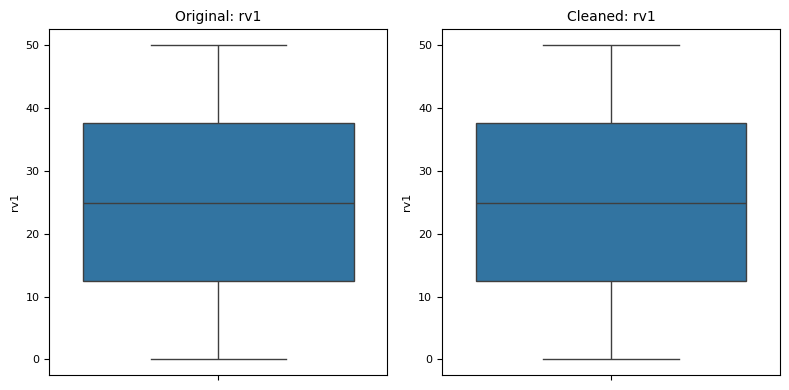

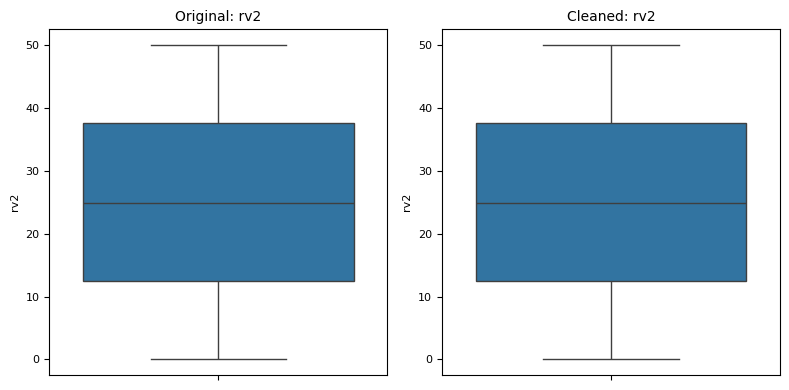

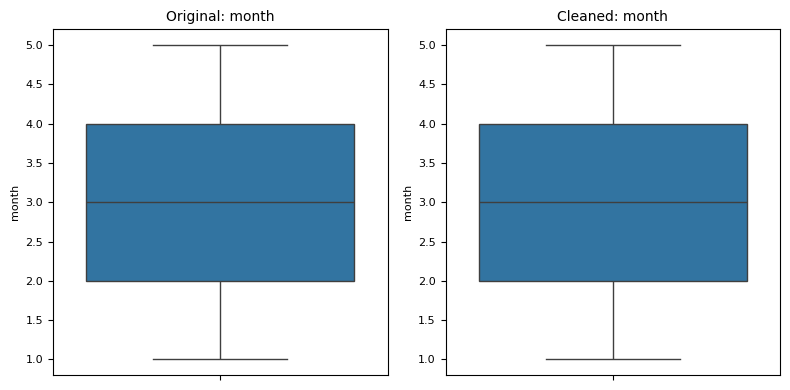

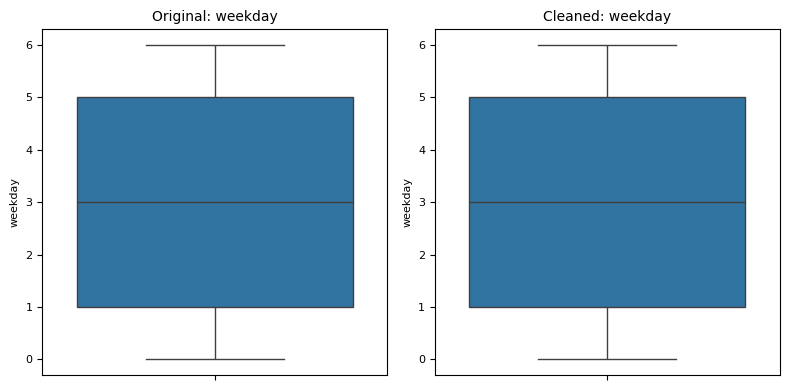

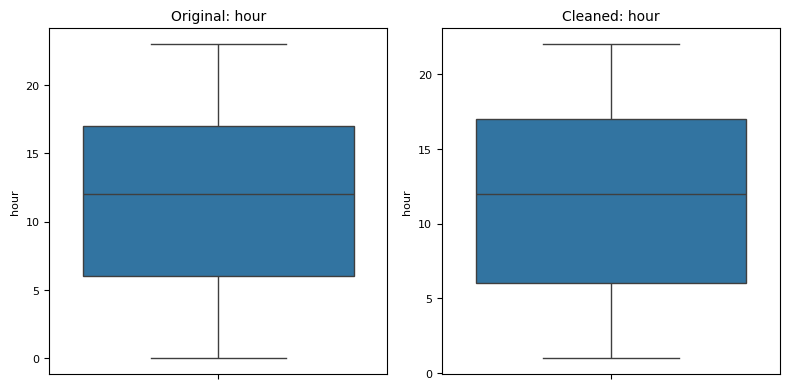

In [45]:
for column in df_energy:
    Q1 =  df_energy[column].quantile(0.25)
    Q3 =  df_energy[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 0.5*IQR
    upper = Q3 + 0.5*IQR
    data_cleaned_iqr =  df_energy[( df_energy[column] >= lower) & ( df_energy[column] <= upper)]

    # Create a box plot for the original data
    plt.figure(figsize=(8, 4))  # Smaller figure size
    plt.subplot(1, 2, 1)
    sns.boxplot(y= df_energy[column])
    plt.title(f'Original: {column}', fontsize=10)  # Smaller title font
    plt.ylabel(column, fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Create a box plot for the cleaned data
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data_cleaned_iqr[column])
    plt.title(f'Cleaned: {column}', fontsize=10)  # Smaller title font
    plt.ylabel(column, fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Show plots
    plt.tight_layout()
    plt.show()

#### skewness after dealing the outlier with IQR

In [46]:
# Create a dictionary to store the skewness values
skewness_dict = {}

# Iterate through the columns in the DataFrame
for col in data_cleaned_iqr.columns:
    skewness = data_cleaned_iqr[col].skew(axis=0, skipna=True)
    skewness_dict[col] = skewness

# Convert the dictionary to a pandas Series and sort it
skewness_series = pd.Series(skewness_dict).sort_values(ascending=True)

# Print the sorted skewness values
print("Skewness of each column:")
print(skewness_series)

Skewness of each column:
out_humidity        -0.868334
Press_mm_hg         -0.426564
hu_living           -0.281341
temp_teen_room      -0.241609
hu_build_out        -0.229837
month               -0.068326
hour                -0.000757
rv2                  0.003993
rv1                  0.003993
weekday              0.018967
temp_kitchen         0.146783
temp_office_room     0.184897
Tdewpoint            0.241418
hu_ironing_room      0.247093
temp_ironing_room    0.253103
hu_teen              0.316946
hu_parent            0.348129
temp_parents_room    0.379991
temp_Laundry_room    0.449945
hu_office            0.451024
Visibility           0.452394
hu_Kitchen           0.461431
hu_laundry           0.465502
temp_out             0.542482
temp_bathroom        0.571672
temp_build_out       0.589810
Windspeed            0.825055
temp_living_room     0.883185
hu_bath              1.930128
lights               2.234778
Appliances           3.243958
dtype: float64


In [47]:
# Highlight the features with high skewness after dealing the outlier with IQR (greater than 0.5 or less than -0.5)
highly_skewed = skewness_series[(skewness_series > 0.5) | (skewness_series < -0.5)]
print("\nHighly skewed features:")
print(highly_skewed)
print(len(highly_skewed))


Highly skewed features:
out_humidity       -0.868334
temp_out            0.542482
temp_bathroom       0.571672
temp_build_out      0.589810
Windspeed           0.825055
temp_living_room    0.883185
hu_bath             1.930128
lights              2.234778
Appliances          3.243958
dtype: float64
9


In [48]:
data_cleaned_iqr.shape

(18091, 31)

In [49]:
df_energy.shape

(19735, 31)

#### Logarithmic transformation

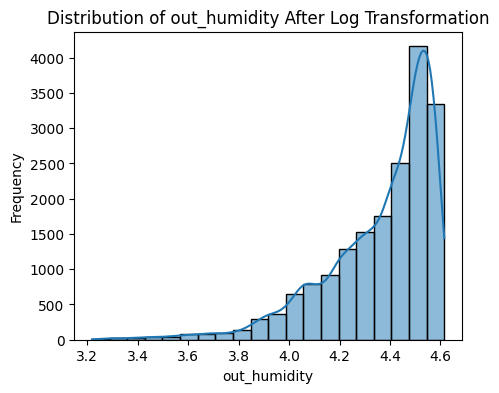

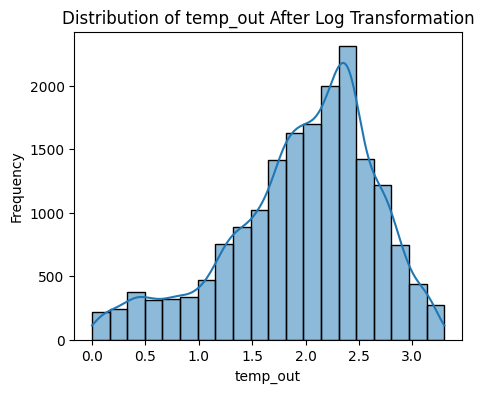

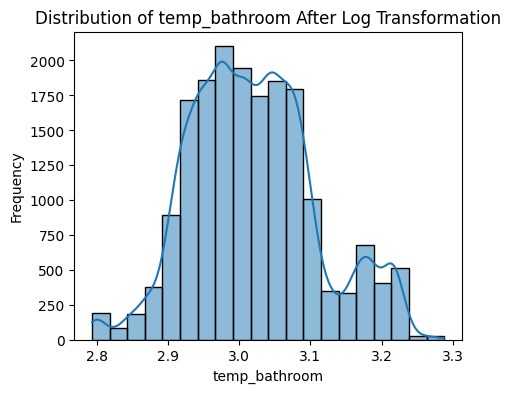

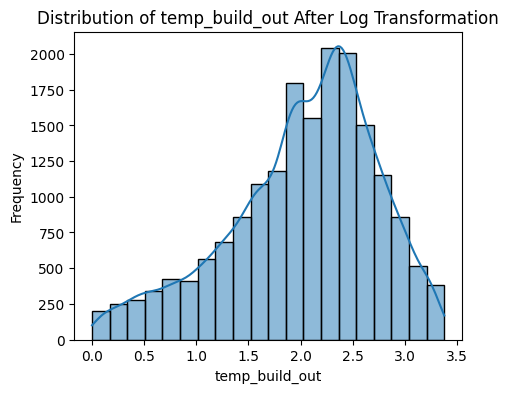

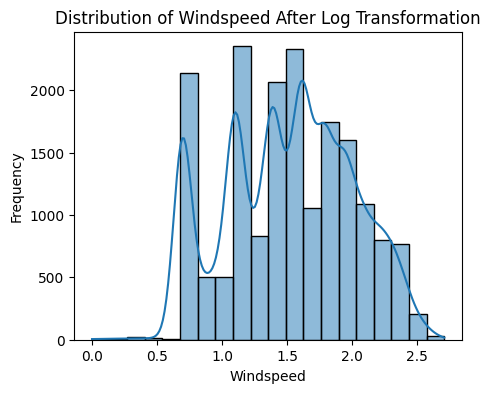

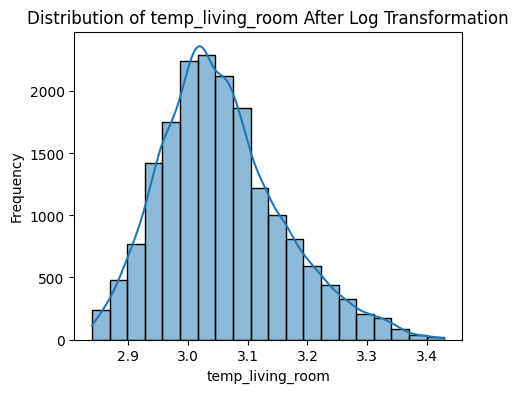

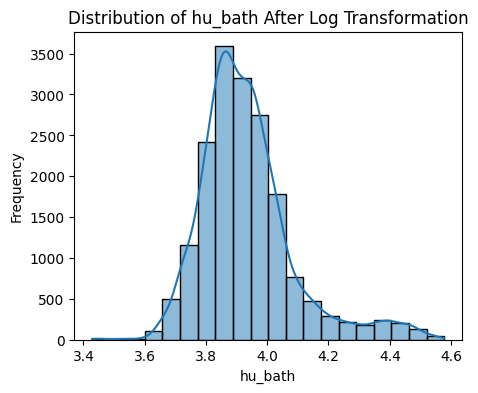

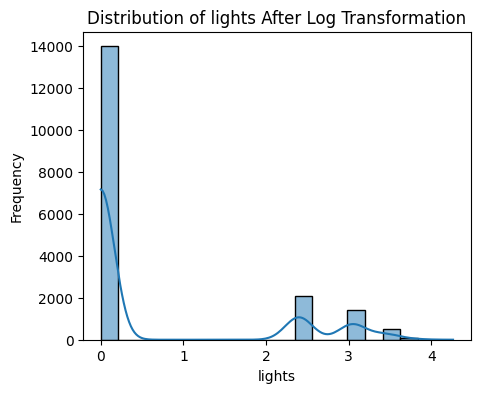

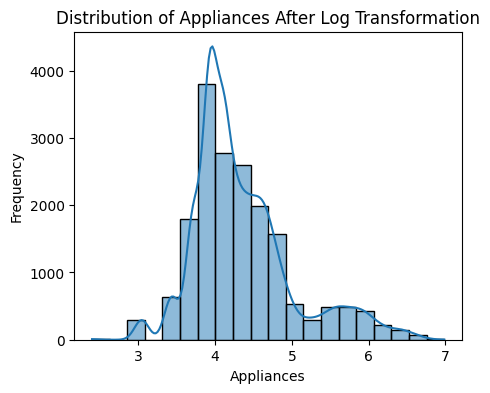

In [50]:

# Create a copy of the original dataframe to avoid modifying it in place
data_transformed_log = data_cleaned_iqr.copy()

# Define the columns to transform (replace with actual columns)
cols_to_transform = ['out_humidity', 'temp_out', 'temp_bathroom', 'temp_build_out', 'Windspeed', 
                     'temp_living_room', 'hu_bath', 'lights', 'Appliances']

# Apply logarithmic transformation on specific columns
for col in cols_to_transform:
    # Apply log transformation only to positive values to avoid math errors
    data_transformed_log[col] = np.log1p(np.abs(data_transformed_log[col]))

# Plot the histograms after log transformation
for col in cols_to_transform:
    plt.figure(figsize=(5, 4))

    # Plot the histogram after transformation
    sns.histplot(data_transformed_log[col], kde=True, bins=20)
    plt.title(f'Distribution of {col} After Log Transformation')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

In [51]:
data_transformed_log.shape

(18091, 31)

#### Skewness of features after logarithmic transformation

In [52]:

# Create a dictionary to store the skewness values
skewness_dict = {}

# Iterate through the columns in the DataFrame
for col in  data_transformed_log.columns:
    skewness =  data_transformed_log[col].skew(axis=0, skipna=True)
    skewness_dict[col] = skewness

# Convert the dictionary to a pandas Series and sort it
skewness_series = pd.Series(skewness_dict).sort_values(ascending=True)

# Print the sorted skewness values
print("Skewness of each column:")
print(skewness_series)

Skewness of each column:
out_humidity        -1.456671
temp_out            -0.721223
temp_build_out      -0.634525
Press_mm_hg         -0.426564
hu_living           -0.281341
temp_teen_room      -0.241609
hu_build_out        -0.229837
Windspeed           -0.079805
month               -0.068326
hour                -0.000757
rv2                  0.003993
rv1                  0.003993
weekday              0.018967
temp_kitchen         0.146783
temp_office_room     0.184897
Tdewpoint            0.241418
hu_ironing_room      0.247093
temp_ironing_room    0.253103
hu_teen              0.316946
temp_bathroom        0.333644
hu_parent            0.348129
temp_parents_room    0.379991
temp_Laundry_room    0.449945
hu_office            0.451024
Visibility           0.452394
hu_Kitchen           0.461431
hu_laundry           0.465502
temp_living_room     0.585862
Appliances           1.115900
hu_bath              1.252972
lights               1.409181
dtype: float64


In [53]:
# Highlight the features with high skewness after log transformation (greater than 0.5 or less than -0.5)
highly_skewed = skewness_series[(skewness_series > 0.5) | (skewness_series < -0.5)]
print("\nHighly skewed features:")
print(highly_skewed)
print(len(highly_skewed))


Highly skewed features:
out_humidity       -1.456671
temp_out           -0.721223
temp_build_out     -0.634525
temp_living_room    0.585862
Appliances          1.115900
hu_bath             1.252972
lights              1.409181
dtype: float64
7


## Dealing outliers with Z Score

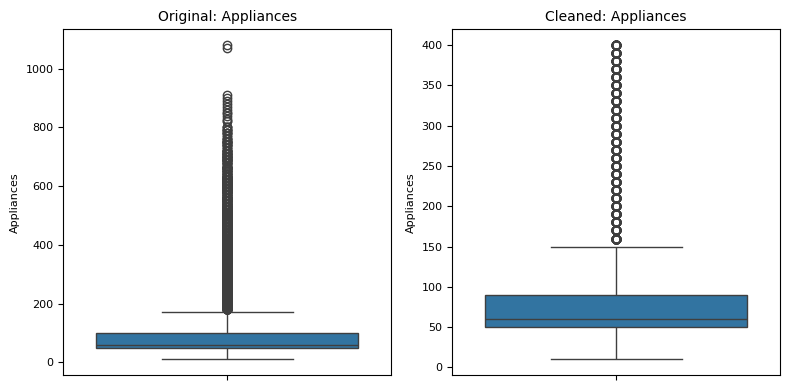

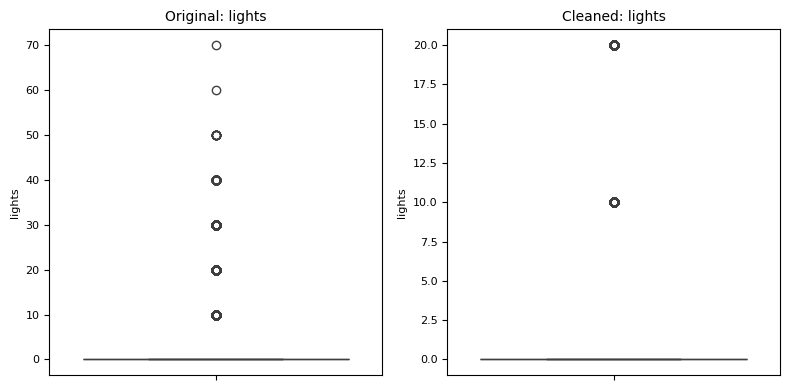

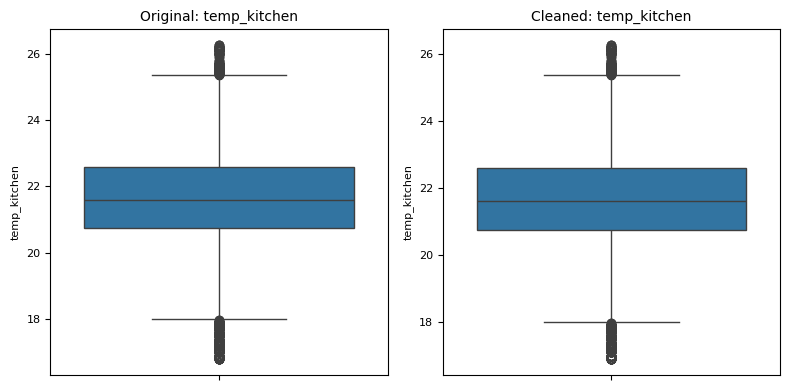

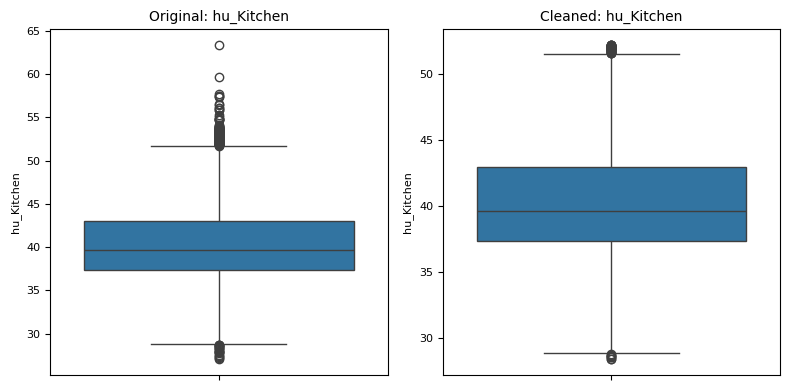

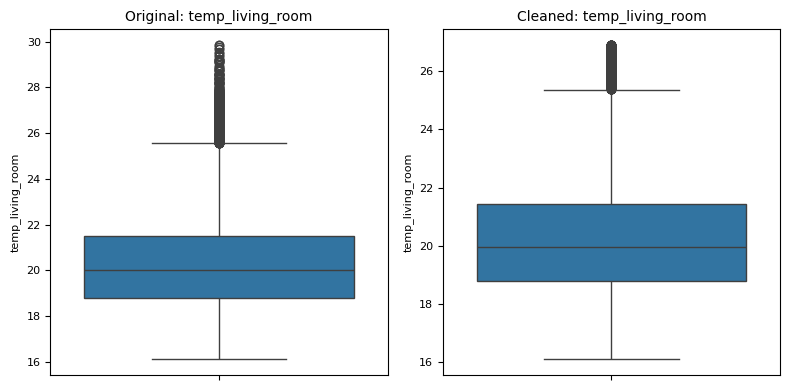

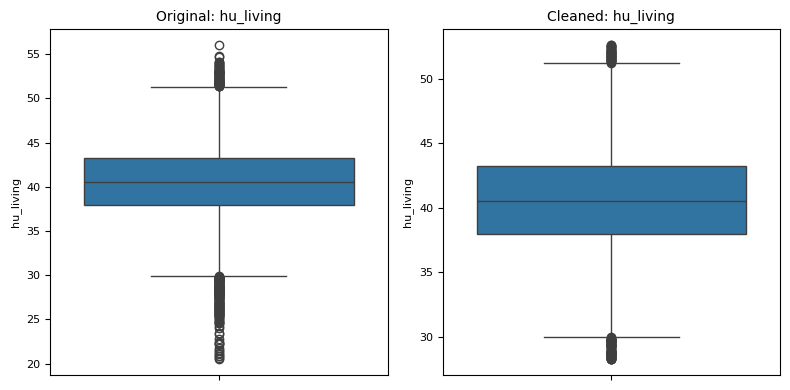

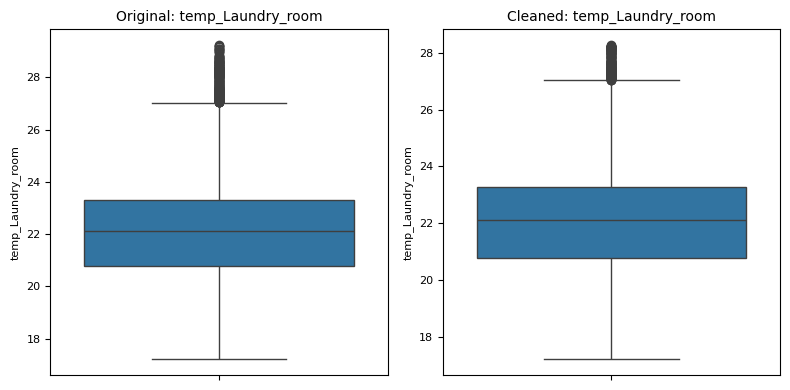

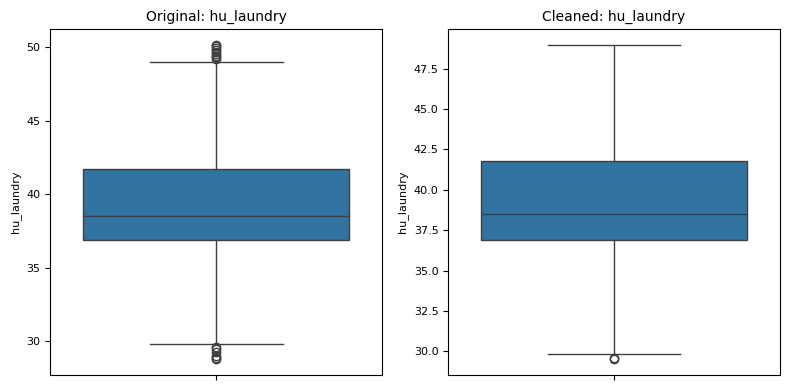

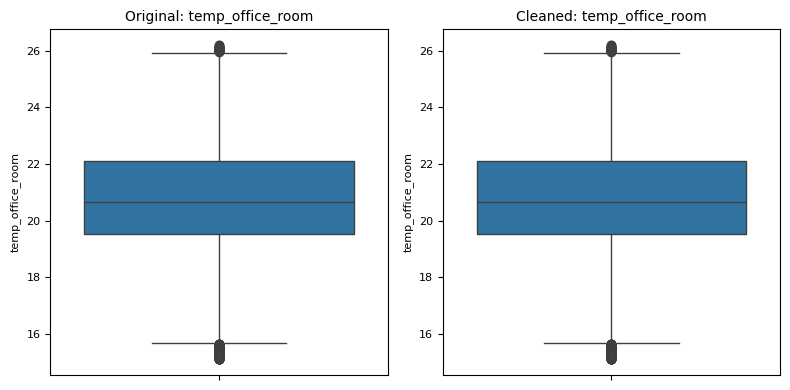

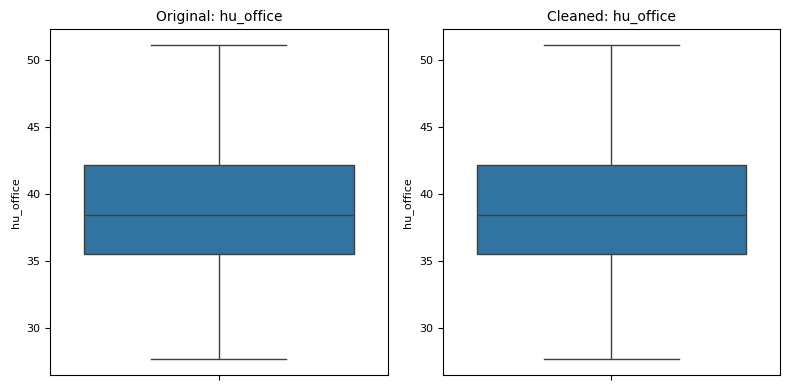

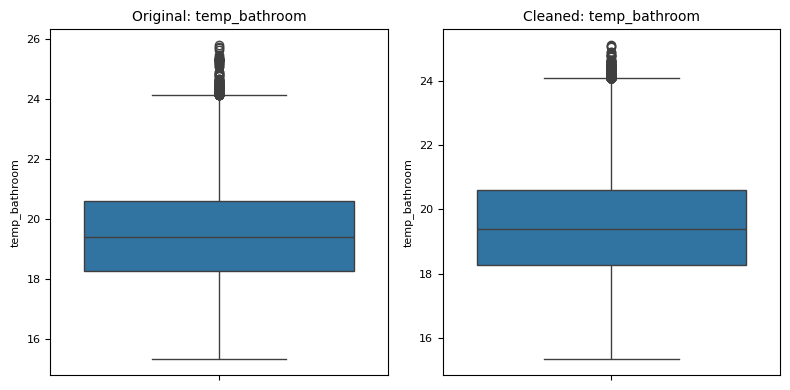

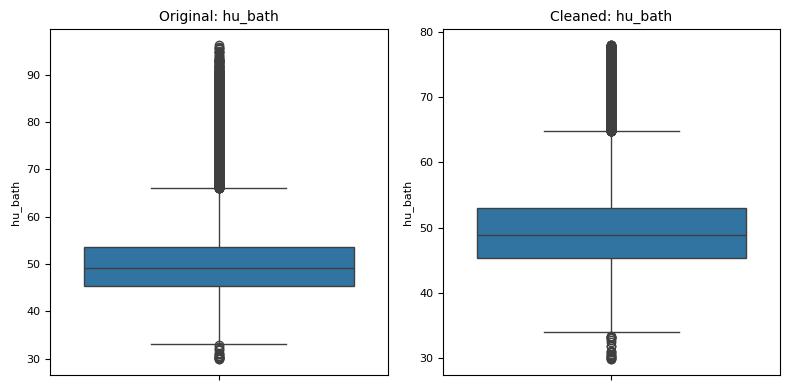

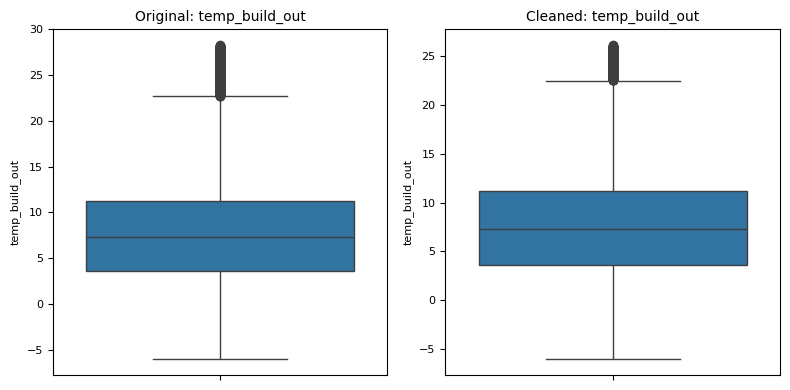

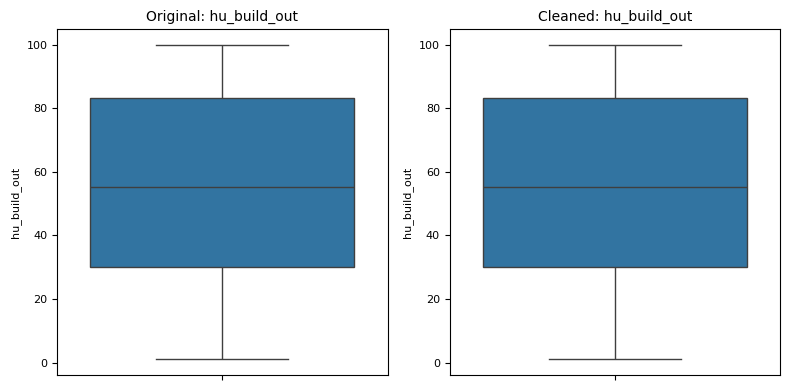

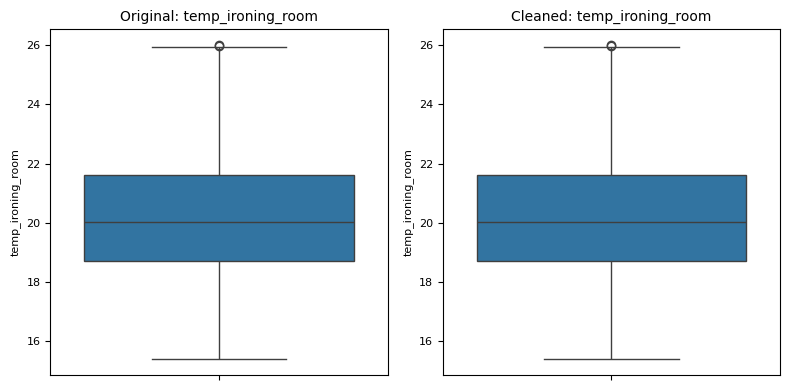

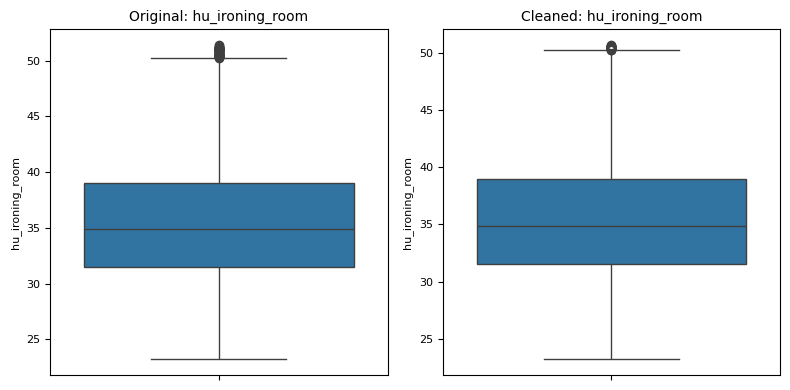

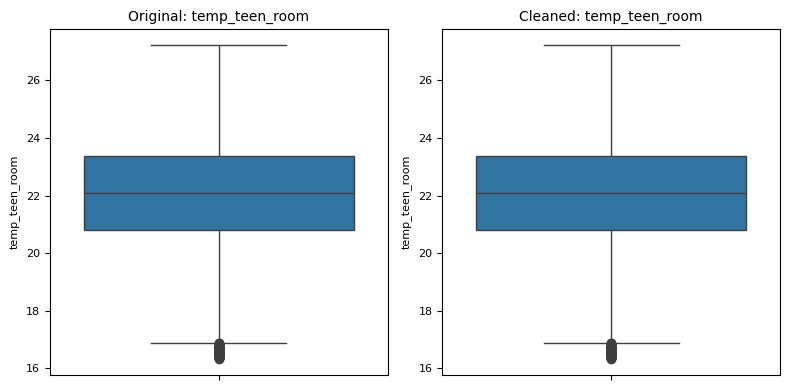

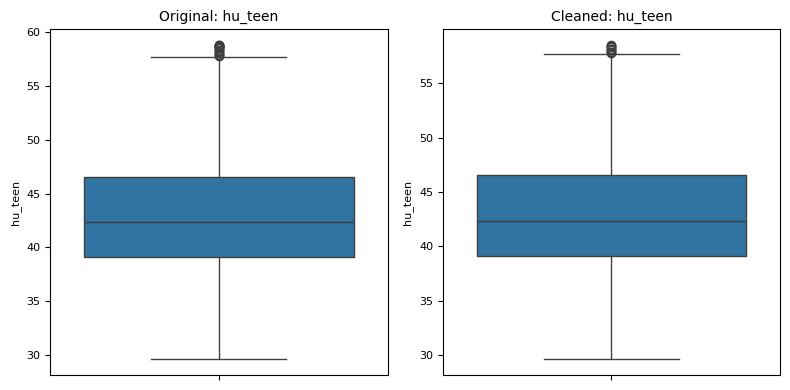

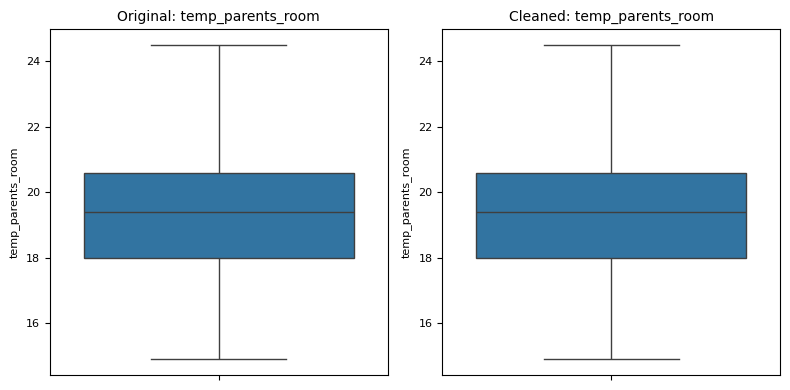

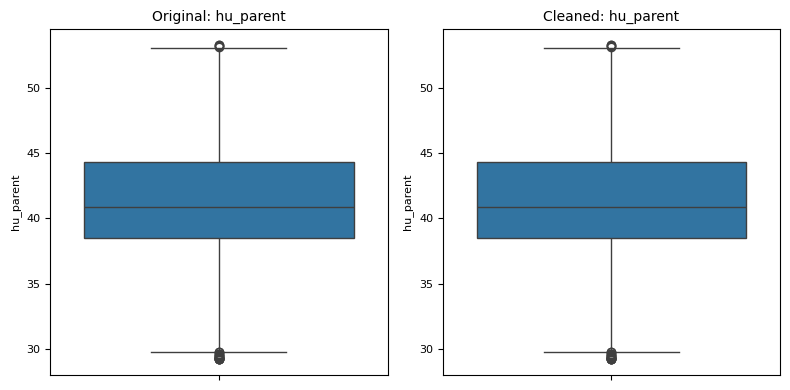

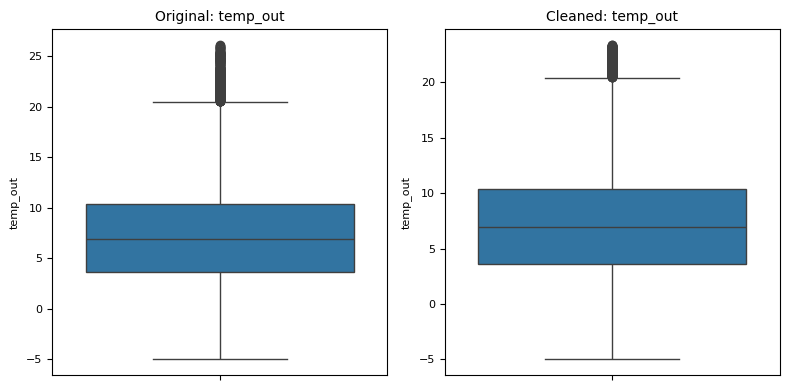

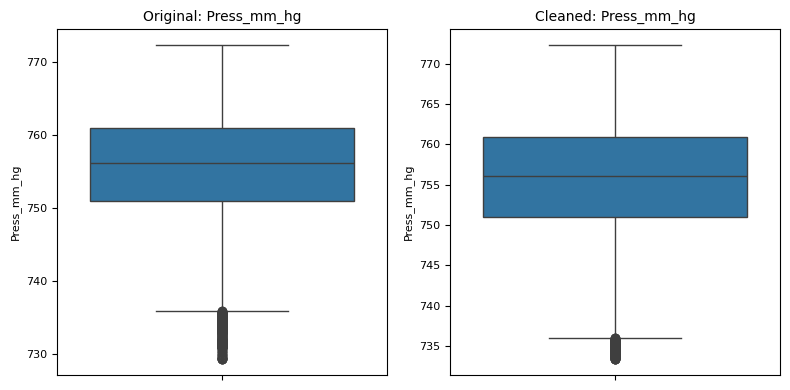

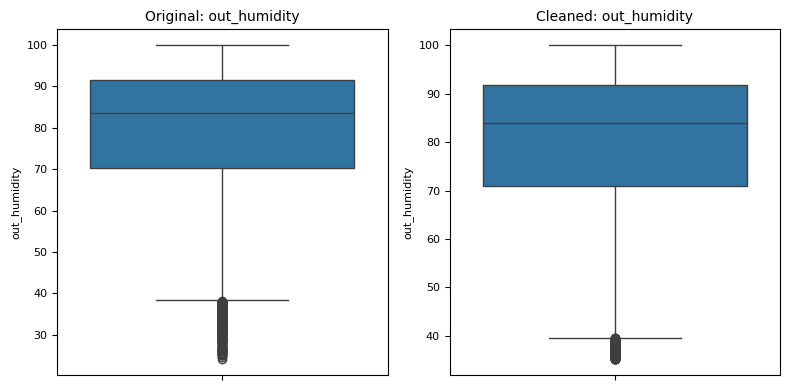

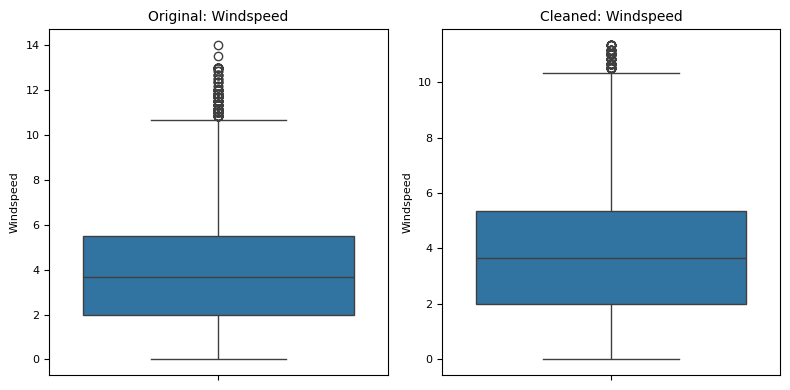

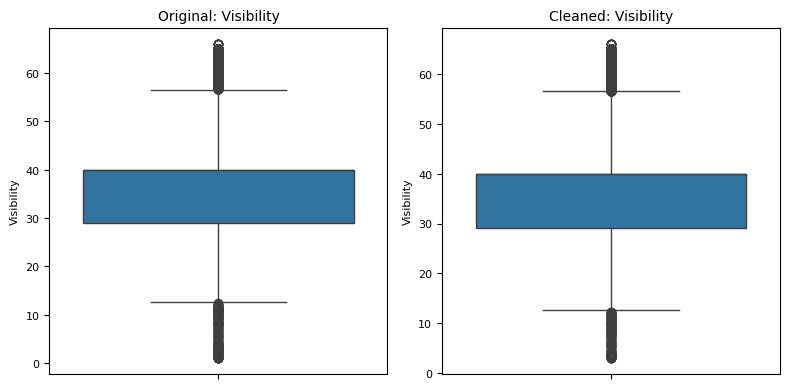

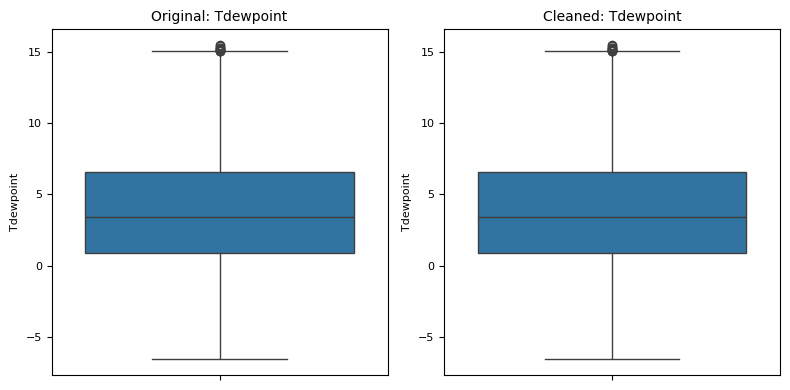

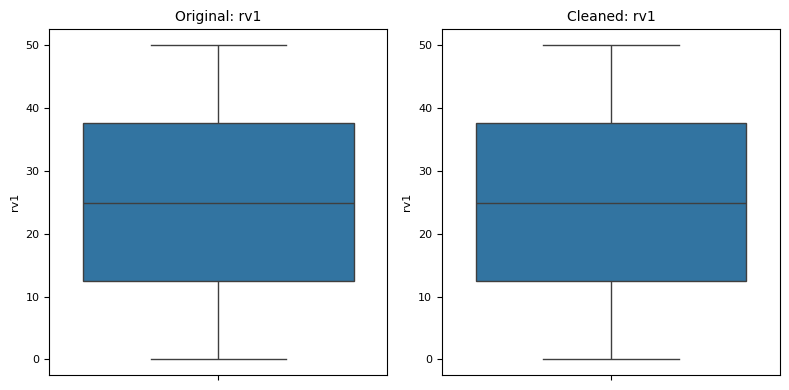

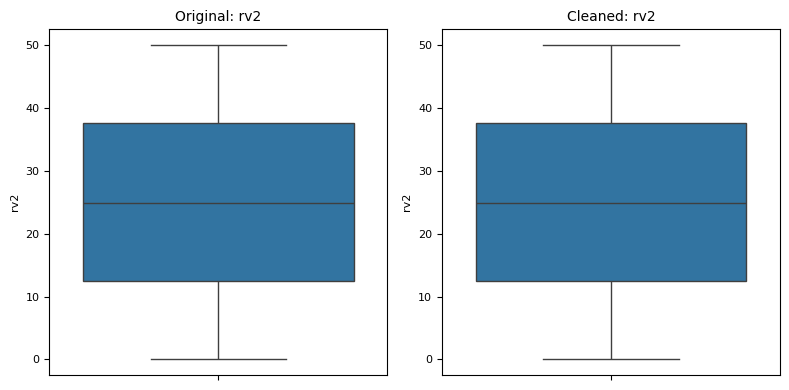

In [54]:
from scipy.stats import zscore

# Create a copy of the dataframe to avoid modifying the original data
df_cleaned = df_energy.copy()

# Iterate through each column to handle outliers using Z-score
for column in df_cleaned.select_dtypes(include=['float64', 'int64']):  # Process numeric columns only
    # Calculate the Z-scores
    z_scores = zscore(df_cleaned[column], nan_policy='omit')

    # Define the threshold for identifying outliers (e.g., |z| > 3)
    threshold = 3

    # Filter out outliers
    data_cleaned_zscore = df_cleaned[(np.abs(z_scores) <= threshold)]

    # Create a box plot for the original data
    plt.figure(figsize=(8, 4))  # Smaller figure size
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Original: {column}', fontsize=10)  # Smaller title font
    plt.ylabel(column, fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Create a box plot for the cleaned data
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data_cleaned_zscore[column])
    plt.title(f'Cleaned: {column}', fontsize=10)  # Smaller title font
    plt.ylabel(column, fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Show plots
    plt.tight_layout()
    plt.show()


In [55]:
data_cleaned_zscore .shape

(19735, 31)

#### Skewness of features after dealing the outlier with Zscore

In [56]:

# Create a dictionary to store the skewness values
skewness_dict = {}

# Iterate through the columns in the DataFrame
for col in data_cleaned_zscore.columns:
    skewness =data_cleaned_zscore [col].skew(axis=0, skipna=True)
    skewness_dict[col] = skewness

# Convert the dictionary to a pandas Series and sort it
skewness_series = pd.Series(skewness_dict).sort_values(ascending=True)

# Print the sorted skewness values
print("Skewness of each column:")
print(skewness_series)

Skewness of each column:
out_humidity        -0.922997
Press_mm_hg         -0.420442
hu_living           -0.268247
temp_teen_room      -0.256151
hu_build_out        -0.241961
month               -0.067969
hour                -0.000673
rv2                  0.004945
rv1                  0.004945
weekday              0.019354
temp_kitchen         0.120917
temp_office_room     0.170384
Tdewpoint            0.239374
hu_ironing_room      0.242141
temp_ironing_room    0.254722
hu_teen              0.308036
hu_parent            0.368937
temp_parents_room    0.382711
Visibility           0.441554
hu_office            0.444614
temp_Laundry_room    0.450777
hu_Kitchen           0.465774
hu_laundry           0.467589
temp_out             0.534273
temp_bathroom        0.558220
temp_build_out       0.597471
Windspeed            0.859982
temp_living_room     0.889658
hu_bath              1.866820
lights               2.195155
Appliances           3.386367
dtype: float64


In [57]:
# Highlight the features with high skewness after dealing outliers with Zscore (greater than 0.5 or less than -0.5)
highly_skewed = skewness_series[(skewness_series > 0.5) | (skewness_series < -0.5)]
print("\nHighly skewed features:")
print(highly_skewed)
print(len(highly_skewed))


Highly skewed features:
out_humidity       -0.922997
temp_out            0.534273
temp_bathroom       0.558220
temp_build_out      0.597471
Windspeed           0.859982
temp_living_room    0.889658
hu_bath             1.866820
lights              2.195155
Appliances          3.386367
dtype: float64
9


## Boxcox Transformation

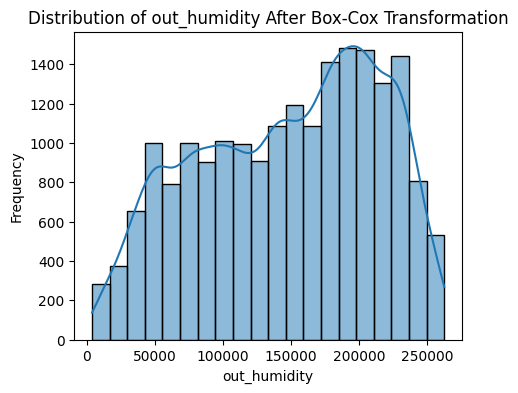

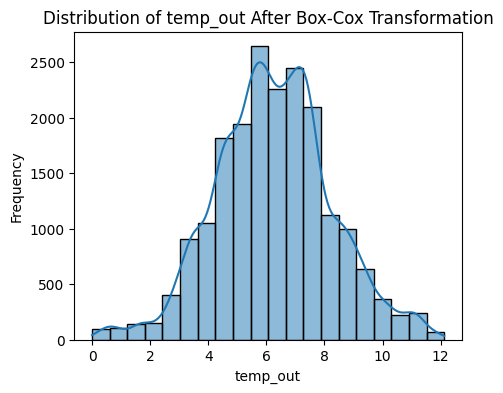

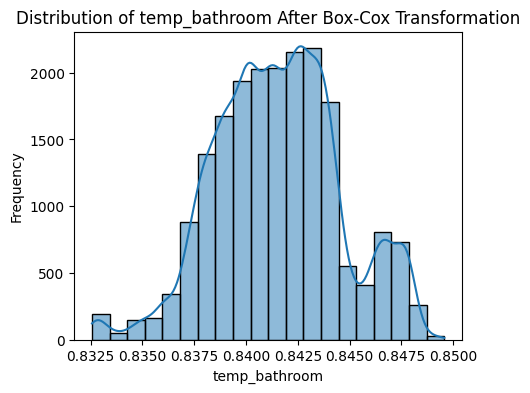

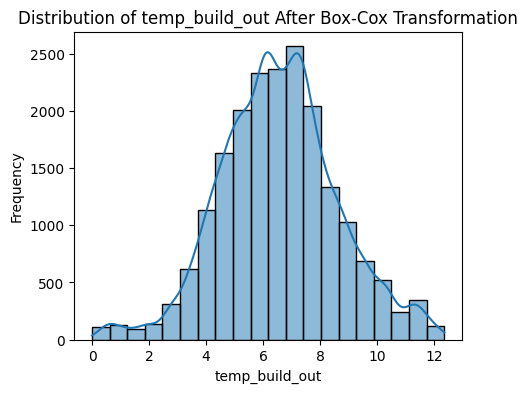

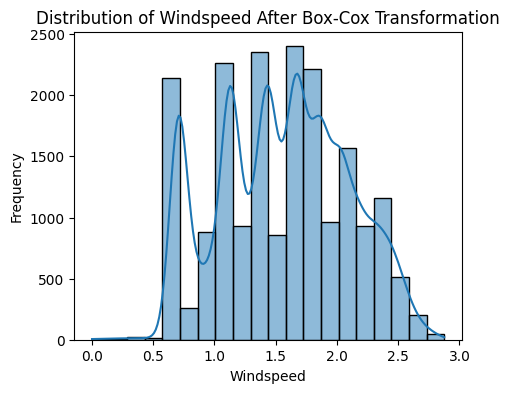

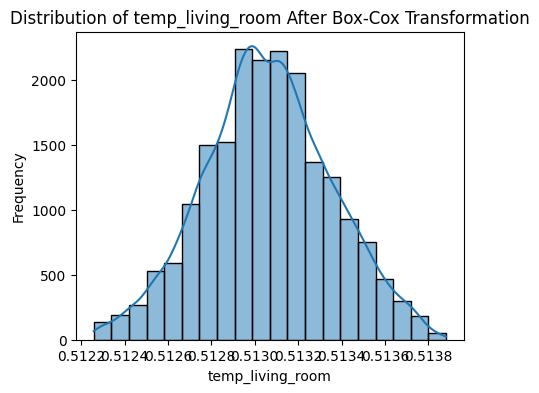

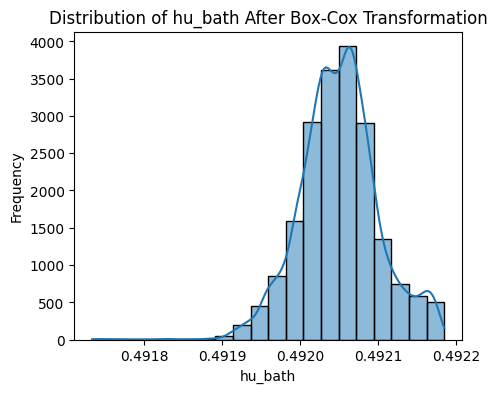

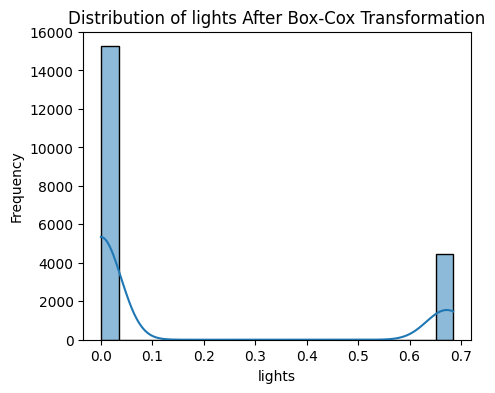

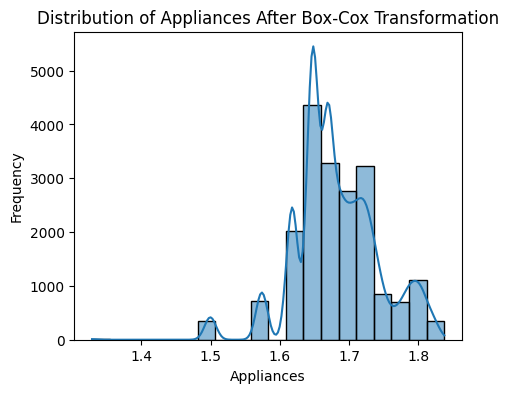

In [58]:
from scipy.stats import boxcox

# Create a copy of the original dataframe to avoid modifying it in place
data_transformed_boxcox = data_cleaned_zscore.copy()

# Define the columns to transform (replace with actual columns)
cols_to_transform = ['out_humidity', 'temp_out', 'temp_bathroom', 'temp_build_out', 'Windspeed', 
                     'temp_living_room', 'hu_bath', 'lights', 'Appliances']

# Apply Box-Cox transformation on specific columns
for col in cols_to_transform:
    # Ensure all values are positive (Box-Cox requires strictly positive values)
    min_val = data_transformed_boxcox[col].min()
    if min_val <= 0:
        data_transformed_boxcox[col] = data_transformed_boxcox[col] - min_val + 1  # Shift data to be positive

    # Apply Box-Cox transformation
    data_transformed_boxcox[col], _ = boxcox(data_transformed_boxcox[col])

    # Plot the histogram after transformation
    plt.figure(figsize=(5, 4))
    sns.histplot(data_transformed_boxcox[col], kde=True, bins=20)
    plt.title(f'Distribution of {col} After Box-Cox Transformation')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()


#### Skewness of features after boxcox transformation

In [59]:

 # Create a dictionary to store the skewness values
skewness_dict = {}

# Iterate through the columns in the DataFrame
for col in data_transformed_boxcox.columns:
    skewness =data_transformed_boxcox[col].skew(axis=0, skipna=True)
    skewness_dict[col] = skewness

# Convert the dictionary to a pandas Series and sort it
skewness_series = pd.Series(skewness_dict).sort_values(ascending=True)

# Print the sorted skewness values
print("Skewness of each column:")
print(skewness_series)

Skewness of each column:
Press_mm_hg         -0.420442
hu_living           -0.268247
out_humidity        -0.261999
temp_teen_room      -0.256151
hu_build_out        -0.241961
month               -0.067969
hu_bath             -0.054584
Appliances          -0.051776
Windspeed           -0.005854
hour                -0.000673
temp_bathroom        0.002893
rv2                  0.004945
rv1                  0.004945
temp_living_room     0.016901
weekday              0.019354
temp_out             0.020490
temp_build_out       0.030615
temp_kitchen         0.120917
temp_office_room     0.170384
Tdewpoint            0.239374
hu_ironing_room      0.242141
temp_ironing_room    0.254722
hu_teen              0.308036
hu_parent            0.368937
temp_parents_room    0.382711
Visibility           0.441554
hu_office            0.444614
temp_Laundry_room    0.450777
hu_Kitchen           0.465774
hu_laundry           0.467589
lights               1.302951
dtype: float64


In [60]:
# Highlight the features with high skewness after boxcox transformation (greater than 0.5 or less than -0.5)
highly_skewed = skewness_series[(skewness_series > 0.5) | (skewness_series < -0.5)]
print("\nHighly skewed features:")
print(highly_skewed)
print(len(highly_skewed))


Highly skewed features:
lights    1.302951
dtype: float64
1


In [61]:
data_cleaned_zscore .shape

(19735, 31)

In [62]:
data_transformed_boxcox.shape

(19735, 31)

In [63]:
data_cleaned_iqr.shape

(18091, 31)

In [64]:
data_transformed_log.shape

(18091, 31)

## 7 Feature Engineering

#### Since the dataset contains only numeric columns,encoding is not needed

## 8 Feature Selection

In [65]:
data_transformed_boxcox

,Appliances,lights,temp_kitchen,hu_Kitchen,temp_living_room,hu_living,temp_Laundry_room,hu_laundry,temp_office_room,hu_office,...,Press_mm_hg,out_humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday,hour
0,1.669398,0.681631,19.890000,47.596667,0.512931,44.790000,19.790000,44.730000,19.000000,45.566667,...,733.5,205459.801252,2.177732,63.000000,5.300000,13.275433,13.275433,1,0,17
1,1.669398,0.681631,19.890000,46.693333,0.512931,44.722500,19.790000,44.790000,19.000000,45.992500,...,733.6,205459.801252,2.131130,59.166667,5.200000,18.606195,18.606195,1,0,17
2,1.647618,0.681631,19.890000,46.300000,0.512931,44.626667,19.790000,44.933333,18.926667,45.890000,...,733.7,205459.801252,2.082550,55.333333,5.100000,28.642668,28.642668,1,0,17
3,1.647618,0.683172,19.890000,46.066667,0.512931,44.590000,19.790000,45.000000,18.890000,45.723333,...,733.8,205459.801252,2.031811,51.500000,5.000000,45.410389,45.410389,1,0,17
4,1.669398,0.683172,19.890000,46.333333,0.512931,44.530000,19.790000,45.000000,18.890000,45.530000,...,733.9,205459.801252,1.978708,47.666667,4.900000,10.084097,10.084097,1,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,1.720303,0.000000,25.566667,46.560000,0.513658,42.025714,27.200000,41.163333,24.700000,45.590000,...,755.2,46809.334292,1.514768,23.666667,13.333333,43.096812,43.096812,5,4,17
19731,1.710902,0.000000,25.500000,46.500000,0.513649,42.080000,27.133333,41.223333,24.700000,45.590000,...,755.2,47639.384876,1.555062,24.500000,13.300000,49.282940,49.282940,5,4,17
19732,1.787268,0.665395,25.500000,46.596667,0.513640,42.768571,27.050000,41.690000,24.700000,45.730000,...,755.2,48479.096873,1.593954,25.333333,13.266667,29.199117,29.199117,5,4,17
19733,1.807433,0.665395,25.500000,46.990000,0.513625,43.036000,26.890000,41.290000,24.700000,45.790000,...,755.2,49328.524570,1.631540,26.166667,13.233333,6.322784,6.322784,5,4,17


## Select K Best

In [66]:
x=data_transformed_boxcox.drop("Appliances",axis=1)
y=data_transformed_boxcox["Appliances"]

In [67]:
k = 10  # Specify the number of top features to select 
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(x, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = x.columns[selected_indices]

# Display the selected features
print(f"Selected {k} best features:")
print(selected_features.tolist())

Selected 10 best features:
['lights', 'temp_kitchen', 'temp_living_room', 'temp_Laundry_room', 'temp_build_out', 'hu_build_out', 'temp_teen_room', 'temp_out', 'out_humidity', 'hour']


In [68]:
X_selected

array([[6.81631322e-01, 1.98900000e+01, 5.12931223e-01, ...,
        6.10640094e+00, 2.05459801e+05, 1.70000000e+01],
       [6.81631322e-01, 1.98900000e+01, 5.12931223e-01, ...,
        6.06224223e+00, 2.05459801e+05, 1.70000000e+01],
       [6.81631322e-01, 1.98900000e+01, 5.12931223e-01, ...,
        6.01792469e+00, 2.05459801e+05, 1.70000000e+01],
       ...,
       [6.65394671e-01, 2.55000000e+01, 5.13640043e-01, ...,
        1.11458998e+01, 4.84790969e+04, 1.70000000e+01],
       [6.65394671e-01, 2.55000000e+01, 5.13624533e-01, ...,
        1.11090318e+01, 4.93285246e+04, 1.70000000e+01],
       [6.65394671e-01, 2.55000000e+01, 5.13613481e-01, ...,
        1.10720971e+01, 5.01877222e+04, 1.80000000e+01]])